# Multi-armed bandits

River has a `bandit` module. It contains several multi-armed bandit policies, bandit environments, and utilities to benchmark policies on bandit problems.

Bandit environments in River implement the [Gym](https://www.gymlibrary.dev/) interface. You can thus load them with `gym.make`. Note that Gym is intended for reinforcement learning algorithms, while bandit policies are the simplest form of reinforcement learing. Bandit policies learn by receiving a reward after each step, while reinforcement learning algorithms have to learn from feedback that may arrive at the end of a (long) sequence of steps.

In [1]:
import gymnasium as gym

for k in gym.envs.registry:
    if k.startswith('river_bandits'):
        print(k)


River's bandit module offers the `bandit.evaluate` function to benchmark several policies on a given environment. It takes as input a list of bandit policies, a bandit environment (the problem to solve), and a reward object.

In [2]:
import gymnasium as gym
from river import bandit
import pandas as pd
from tqdm import tqdm
from river import stats

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)

trace = bandit.evaluate(
    policies=policies,
    env=env,
    reward_stat=stats.Mean(),
    n_episodes=(n_episodes := 2000),
)


The `bandit.evaluate` function returns a generator containing the results at each step of the benchmark. This can be wrapped with a `pandas.DataFrame` to gather all the results.

In [3]:
trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))
trace_df.sample(5, random_state=42)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 11659/6000000 [00:00<00:51, 116578.72it/s]

  0%|          | 23749/6000000 [00:00<00:50, 119117.94it/s]

  1%|          | 35688/6000000 [00:00<00:50, 119239.10it/s]

  1%|          | 47750/6000000 [00:00<00:49, 119780.34it/s]

  1%|          | 59799/6000000 [00:00<00:49, 120032.77it/s]

  1%|          | 71803/6000000 [00:00<00:49, 119450.64it/s]

  1%|▏         | 84001/6000000 [00:00<00:49, 119753.58it/s]

  2%|▏         | 96002/6000000 [00:00<00:49, 119778.84it/s]

  2%|▏         | 108001/6000000 [00:00<00:49, 119730.32it/s]

  2%|▏         | 120025/6000000 [00:01<00:49, 119883.74it/s]

  2%|▏         | 132014/6000000 [00:01<00:48, 119779.92it/s]

  2%|▏         | 144001/6000000 [00:01<00:48, 119647.81it/s]

  3%|▎         | 156001/6000000 [00:01<00:48, 119724.34it/s]

  3%|▎         | 168029/6000000 [00:01<00:48, 119887.41it/s]

  3%|▎         | 180081/6000000 [00:01<00:48, 120075.11it/s]

  3%|▎         | 192089/6000000 [00:01<00:48, 119979.15it/s]

  3%|▎         | 204087/6000000 [00:01<00:48, 119563.54it/s]

  4%|▎         | 216209/6000000 [00:01<00:48, 120056.77it/s]

  4%|▍         | 228257/6000000 [00:01<00:48, 120181.39it/s]

  4%|▍         | 240276/6000000 [00:02<00:48, 119791.91it/s]

  4%|▍         | 252361/6000000 [00:02<00:47, 120105.55it/s]

  4%|▍         | 264372/6000000 [00:02<00:47, 120068.09it/s]

  5%|▍         | 276380/6000000 [00:02<00:47, 119835.00it/s]

  5%|▍         | 288364/6000000 [00:02<00:47, 119699.04it/s]

  5%|▌         | 300352/6000000 [00:02<00:47, 119750.40it/s]

  5%|▌         | 312452/6000000 [00:02<00:47, 120122.40it/s]

  5%|▌         | 324465/6000000 [00:02<00:47, 120016.86it/s]

  6%|▌         | 336748/6000000 [00:02<00:46, 120857.39it/s]

  6%|▌         | 348834/6000000 [00:02<00:46, 120772.18it/s]

  6%|▌         | 360912/6000000 [00:03<00:47, 119926.16it/s]

  6%|▌         | 372906/6000000 [00:03<00:47, 119720.56it/s]

  6%|▋         | 384879/6000000 [00:03<00:46, 119645.09it/s]

  7%|▋         | 396845/6000000 [00:03<00:46, 119216.68it/s]

  7%|▋         | 408878/6000000 [00:03<00:46, 119546.68it/s]

  7%|▋         | 421077/6000000 [00:03<00:46, 120275.96it/s]

  7%|▋         | 433106/6000000 [00:03<00:46, 119473.38it/s]

  7%|▋         | 445116/6000000 [00:03<00:46, 119657.18it/s]

  8%|▊         | 457083/6000000 [00:03<00:46, 119558.65it/s]

  8%|▊         | 469271/6000000 [00:03<00:45, 120250.61it/s]

  8%|▊         | 481297/6000000 [00:04<00:54, 101976.67it/s]

  8%|▊         | 493183/6000000 [00:04<00:51, 106466.93it/s]

  8%|▊         | 505219/6000000 [00:04<00:49, 110290.68it/s]

  9%|▊         | 517197/6000000 [00:04<00:48, 112967.38it/s]

  9%|▉         | 529075/6000000 [00:04<00:47, 114637.35it/s]

  9%|▉         | 540937/6000000 [00:04<00:47, 115794.60it/s]

  9%|▉         | 552891/6000000 [00:04<00:46, 116891.74it/s]

  9%|▉         | 564696/6000000 [00:04<00:46, 117233.35it/s]

 10%|▉         | 576769/6000000 [00:04<00:45, 118268.42it/s]

 10%|▉         | 588826/6000000 [00:04<00:45, 118953.09it/s]

 10%|█         | 600754/6000000 [00:05<00:45, 118511.33it/s]

 10%|█         | 612915/6000000 [00:05<00:45, 119433.98it/s]

 10%|█         | 624875/6000000 [00:05<00:45, 119141.96it/s]

 11%|█         | 636801/6000000 [00:05<00:45, 119093.42it/s]

 11%|█         | 648755/6000000 [00:05<00:44, 119225.25it/s]

 11%|█         | 660824/6000000 [00:05<00:44, 119660.84it/s]

 11%|█         | 672795/6000000 [00:05<00:45, 117233.84it/s]

 11%|█▏        | 684770/6000000 [00:05<00:45, 117976.03it/s]

 12%|█▏        | 696864/6000000 [00:05<00:44, 118853.33it/s]

 12%|█▏        | 708913/6000000 [00:05<00:44, 119338.32it/s]

 12%|█▏        | 720854/6000000 [00:06<00:44, 119238.20it/s]

 12%|█▏        | 732831/6000000 [00:06<00:44, 119394.41it/s]

 12%|█▏        | 744925/6000000 [00:06<00:43, 119855.51it/s]

 13%|█▎        | 756913/6000000 [00:06<00:43, 119835.85it/s]

 13%|█▎        | 768899/6000000 [00:06<00:43, 119723.61it/s]

 13%|█▎        | 780947/6000000 [00:06<00:43, 119949.36it/s]

 13%|█▎        | 792943/6000000 [00:06<00:43, 119827.70it/s]

 13%|█▎        | 804945/6000000 [00:06<00:43, 119883.36it/s]

 14%|█▎        | 817072/6000000 [00:06<00:43, 120296.92it/s]

 14%|█▍        | 829192/6000000 [00:06<00:42, 120566.96it/s]

 14%|█▍        | 841249/6000000 [00:07<00:42, 120353.60it/s]

 14%|█▍        | 853285/6000000 [00:07<00:42, 120133.11it/s]

 14%|█▍        | 865299/6000000 [00:07<00:42, 119986.93it/s]

 15%|█▍        | 877442/6000000 [00:07<00:42, 120416.19it/s]

 15%|█▍        | 889484/6000000 [00:07<00:42, 119664.43it/s]

 15%|█▌        | 901452/6000000 [00:07<00:42, 119272.46it/s]

 15%|█▌        | 913381/6000000 [00:07<00:42, 119170.40it/s]

 15%|█▌        | 925583/6000000 [00:07<00:42, 120018.45it/s]

 16%|█▌        | 937625/6000000 [00:07<00:42, 120135.95it/s]

 16%|█▌        | 949724/6000000 [00:07<00:41, 120388.73it/s]

 16%|█▌        | 961764/6000000 [00:08<00:42, 119295.24it/s]

 16%|█▌        | 973812/6000000 [00:08<00:42, 119646.55it/s]

 16%|█▋        | 985877/6000000 [00:08<00:41, 119943.44it/s]

 17%|█▋        | 997873/6000000 [00:08<00:41, 119721.25it/s]

 17%|█▋        | 1009866/6000000 [00:08<00:41, 119780.67it/s]

 17%|█▋        | 1021846/6000000 [00:08<00:41, 119782.65it/s]

 17%|█▋        | 1033825/6000000 [00:08<00:41, 119118.24it/s]

 17%|█▋        | 1045738/6000000 [00:08<00:41, 119092.30it/s]

 18%|█▊        | 1057747/6000000 [00:08<00:41, 119388.69it/s]

 18%|█▊        | 1069738/6000000 [00:08<00:41, 119543.67it/s]

 18%|█▊        | 1081693/6000000 [00:09<00:41, 119374.31it/s]

 18%|█▊        | 1093631/6000000 [00:09<00:41, 119333.89it/s]

 18%|█▊        | 1105630/6000000 [00:09<00:40, 119529.28it/s]

 19%|█▊        | 1117584/6000000 [00:09<00:40, 119368.81it/s]

 19%|█▉        | 1129617/6000000 [00:09<00:40, 119654.95it/s]

 19%|█▉        | 1141609/6000000 [00:09<00:40, 119733.54it/s]

 19%|█▉        | 1153583/6000000 [00:09<00:40, 119648.81it/s]

 19%|█▉        | 1165621/6000000 [00:09<00:40, 119867.26it/s]

 20%|█▉        | 1177625/6000000 [00:09<00:40, 119917.88it/s]

 20%|█▉        | 1189617/6000000 [00:09<00:40, 119747.69it/s]

 20%|██        | 1201592/6000000 [00:10<00:40, 119435.25it/s]

 20%|██        | 1213572/6000000 [00:10<00:40, 119543.47it/s]

 20%|██        | 1225622/6000000 [00:10<00:39, 119826.90it/s]

 21%|██        | 1237605/6000000 [00:10<00:39, 119604.64it/s]

 21%|██        | 1249566/6000000 [00:10<00:39, 119569.84it/s]

 21%|██        | 1261524/6000000 [00:10<00:39, 119550.13it/s]

 21%|██        | 1273480/6000000 [00:10<00:39, 119467.71it/s]

 21%|██▏       | 1285427/6000000 [00:10<00:39, 118701.79it/s]

 22%|██▏       | 1297563/6000000 [00:10<00:39, 119493.86it/s]

 22%|██▏       | 1309648/6000000 [00:11<00:39, 119896.85it/s]

 22%|██▏       | 1321639/6000000 [00:11<00:39, 119886.45it/s]

 22%|██▏       | 1333767/6000000 [00:11<00:38, 120301.91it/s]

 22%|██▏       | 1345798/6000000 [00:11<00:38, 119990.52it/s]

 23%|██▎       | 1358035/6000000 [00:11<00:38, 120700.50it/s]

 23%|██▎       | 1370122/6000000 [00:11<00:38, 120748.78it/s]

 23%|██▎       | 1382198/6000000 [00:11<00:38, 120622.17it/s]

 23%|██▎       | 1394261/6000000 [00:11<00:38, 120177.83it/s]

 23%|██▎       | 1406329/6000000 [00:11<00:38, 120325.20it/s]

 24%|██▎       | 1418408/6000000 [00:11<00:38, 120463.61it/s]

 24%|██▍       | 1430455/6000000 [00:12<00:38, 120012.41it/s]

 24%|██▍       | 1442457/6000000 [00:12<00:38, 119632.97it/s]

 24%|██▍       | 1454558/6000000 [00:12<00:37, 120041.83it/s]

 24%|██▍       | 1466671/6000000 [00:12<00:37, 120364.51it/s]

 25%|██▍       | 1478708/6000000 [00:12<00:37, 120275.65it/s]

 25%|██▍       | 1490755/6000000 [00:12<00:37, 120332.65it/s]

 25%|██▌       | 1502887/6000000 [00:12<00:37, 120626.01it/s]

 25%|██▌       | 1514951/6000000 [00:12<00:37, 120628.43it/s]

 25%|██▌       | 1527014/6000000 [00:12<00:37, 119477.89it/s]

 26%|██▌       | 1539110/6000000 [00:12<00:37, 119917.29it/s]

 26%|██▌       | 1551242/6000000 [00:13<00:36, 120333.51it/s]

 26%|██▌       | 1563278/6000000 [00:13<00:37, 118602.25it/s]

 26%|██▋       | 1575404/6000000 [00:13<00:37, 119387.15it/s]

 26%|██▋       | 1587518/6000000 [00:13<00:36, 119905.63it/s]

 27%|██▋       | 1599530/6000000 [00:13<00:36, 119966.76it/s]

 27%|██▋       | 1611530/6000000 [00:13<00:36, 119772.54it/s]

 27%|██▋       | 1623510/6000000 [00:13<00:36, 119700.73it/s]

 27%|██▋       | 1635601/6000000 [00:13<00:36, 120060.23it/s]

 27%|██▋       | 1647808/6000000 [00:13<00:36, 120659.74it/s]

 28%|██▊       | 1659875/6000000 [00:13<00:36, 119982.03it/s]

 28%|██▊       | 1671875/6000000 [00:14<00:36, 119702.77it/s]

 28%|██▊       | 1683847/6000000 [00:14<00:36, 117340.29it/s]

 28%|██▊       | 1695958/6000000 [00:14<00:36, 118450.42it/s]

 28%|██▊       | 1707936/6000000 [00:14<00:36, 118842.88it/s]

 29%|██▊       | 1720040/6000000 [00:14<00:35, 119493.68it/s]

 29%|██▉       | 1731995/6000000 [00:14<00:36, 118050.32it/s]

 29%|██▉       | 1744018/6000000 [00:14<00:35, 118694.59it/s]

 29%|██▉       | 1756059/6000000 [00:14<00:35, 119203.41it/s]

 29%|██▉       | 1768100/6000000 [00:14<00:35, 119562.27it/s]

 30%|██▉       | 1780297/6000000 [00:14<00:35, 120278.75it/s]

 30%|██▉       | 1792328/6000000 [00:15<00:35, 120209.44it/s]

 30%|███       | 1804351/6000000 [00:15<00:34, 120157.26it/s]

 30%|███       | 1816471/6000000 [00:15<00:34, 120467.96it/s]

 30%|███       | 1828519/6000000 [00:15<00:34, 120368.45it/s]

 31%|███       | 1840639/6000000 [00:15<00:34, 120616.75it/s]

 31%|███       | 1852721/6000000 [00:15<00:34, 120676.66it/s]

 31%|███       | 1864928/6000000 [00:15<00:34, 121091.06it/s]

 31%|███▏      | 1877038/6000000 [00:15<00:34, 120721.41it/s]

 31%|███▏      | 1889111/6000000 [00:15<00:34, 120557.51it/s]

 32%|███▏      | 1901168/6000000 [00:15<00:34, 120201.36it/s]

 32%|███▏      | 1913189/6000000 [00:16<00:34, 119740.03it/s]

 32%|███▏      | 1925164/6000000 [00:16<00:34, 117381.00it/s]

 32%|███▏      | 1937175/6000000 [00:16<00:34, 118184.05it/s]

 32%|███▏      | 1949265/6000000 [00:16<00:34, 118987.52it/s]

 33%|███▎      | 1961293/6000000 [00:16<00:33, 119370.29it/s]

 33%|███▎      | 1973240/6000000 [00:16<00:33, 119398.44it/s]

 33%|███▎      | 1985294/6000000 [00:16<00:33, 119736.73it/s]

 33%|███▎      | 1997334/6000000 [00:16<00:33, 119934.71it/s]

 33%|███▎      | 2009330/6000000 [00:16<00:33, 119809.17it/s]

 34%|███▎      | 2021404/6000000 [00:16<00:33, 120086.28it/s]

 34%|███▍      | 2033414/6000000 [00:17<00:33, 119704.56it/s]

 34%|███▍      | 2045386/6000000 [00:17<00:33, 118990.77it/s]

 34%|███▍      | 2057396/6000000 [00:17<00:33, 119320.96it/s]

 34%|███▍      | 2069330/6000000 [00:17<00:33, 118867.99it/s]

 35%|███▍      | 2081218/6000000 [00:17<00:33, 115887.62it/s]

 35%|███▍      | 2092823/6000000 [00:17<00:33, 115465.69it/s]

 35%|███▌      | 2104926/6000000 [00:17<00:33, 117103.68it/s]

 35%|███▌      | 2116984/6000000 [00:17<00:32, 118131.25it/s]

 35%|███▌      | 2129003/6000000 [00:17<00:32, 118741.24it/s]

 36%|███▌      | 2141019/6000000 [00:17<00:32, 119161.84it/s]

 36%|███▌      | 2153153/6000000 [00:18<00:32, 119810.96it/s]

 36%|███▌      | 2165138/6000000 [00:18<00:32, 117545.58it/s]

 36%|███▋      | 2177139/6000000 [00:18<00:32, 118273.02it/s]

 36%|███▋      | 2189362/6000000 [00:18<00:31, 119446.48it/s]

 37%|███▋      | 2201496/6000000 [00:18<00:31, 120007.39it/s]

 37%|███▋      | 2213503/6000000 [00:18<00:31, 119841.45it/s]

 37%|███▋      | 2225492/6000000 [00:18<00:31, 119612.32it/s]

 37%|███▋      | 2237691/6000000 [00:18<00:31, 120321.35it/s]

 37%|███▋      | 2249726/6000000 [00:18<00:31, 119764.53it/s]

 38%|███▊      | 2261705/6000000 [00:18<00:31, 119664.08it/s]

 38%|███▊      | 2273764/6000000 [00:19<00:31, 119939.93it/s]

 38%|███▊      | 2285760/6000000 [00:19<00:31, 119357.53it/s]

 38%|███▊      | 2297698/6000000 [00:19<00:31, 119312.85it/s]

 38%|███▊      | 2309733/6000000 [00:19<00:30, 119621.24it/s]

 39%|███▊      | 2321696/6000000 [00:19<00:30, 119462.46it/s]

 39%|███▉      | 2333882/6000000 [00:19<00:30, 120176.64it/s]

 39%|███▉      | 2345985/6000000 [00:19<00:30, 120429.90it/s]

 39%|███▉      | 2358029/6000000 [00:19<00:30, 119383.08it/s]

 40%|███▉      | 2370031/6000000 [00:19<00:30, 119571.46it/s]

 40%|███▉      | 2382107/6000000 [00:19<00:30, 119924.97it/s]

 40%|███▉      | 2394110/6000000 [00:20<00:30, 119954.35it/s]

 40%|████      | 2406107/6000000 [00:20<00:30, 119727.66it/s]

 40%|████      | 2418165/6000000 [00:20<00:29, 119978.24it/s]

 41%|████      | 2430220/6000000 [00:20<00:29, 120146.60it/s]

 41%|████      | 2442236/6000000 [00:20<00:29, 119989.89it/s]

 41%|████      | 2454236/6000000 [00:20<00:29, 119829.15it/s]

 41%|████      | 2466316/6000000 [00:20<00:29, 120117.69it/s]

 41%|████▏     | 2478417/6000000 [00:20<00:29, 120383.68it/s]

 42%|████▏     | 2490630/6000000 [00:20<00:29, 120906.13it/s]

 42%|████▏     | 2502721/6000000 [00:20<00:29, 120472.96it/s]

 42%|████▏     | 2514795/6000000 [00:21<00:28, 120551.83it/s]

 42%|████▏     | 2526851/6000000 [00:21<00:28, 120299.23it/s]

 42%|████▏     | 2538882/6000000 [00:21<00:29, 118191.53it/s]

 43%|████▎     | 2550879/6000000 [00:21<00:29, 118697.74it/s]

 43%|████▎     | 2562857/6000000 [00:21<00:28, 119018.61it/s]

 43%|████▎     | 2574792/6000000 [00:21<00:28, 119114.47it/s]

 43%|████▎     | 2586919/6000000 [00:21<00:28, 119757.37it/s]

 43%|████▎     | 2599072/6000000 [00:21<00:28, 120285.07it/s]

 44%|████▎     | 2611103/6000000 [00:21<00:28, 120154.20it/s]

 44%|████▎     | 2623158/6000000 [00:21<00:28, 120270.70it/s]

 44%|████▍     | 2635187/6000000 [00:22<00:28, 120106.13it/s]

 44%|████▍     | 2647274/6000000 [00:22<00:27, 120333.35it/s]

 44%|████▍     | 2659308/6000000 [00:22<00:28, 117461.34it/s]

 45%|████▍     | 2671165/6000000 [00:22<00:28, 117785.19it/s]

 45%|████▍     | 2683029/6000000 [00:22<00:28, 118036.43it/s]

 45%|████▍     | 2694952/6000000 [00:22<00:27, 118389.92it/s]

 45%|████▌     | 2706978/6000000 [00:22<00:27, 118947.05it/s]

 45%|████▌     | 2718878/6000000 [00:22<00:34, 94974.03it/s] 

 46%|████▌     | 2730881/6000000 [00:22<00:32, 101339.12it/s]

 46%|████▌     | 2743087/6000000 [00:23<00:30, 106856.70it/s]

 46%|████▌     | 2755041/6000000 [00:23<00:29, 110350.34it/s]

 46%|████▌     | 2766851/6000000 [00:23<00:28, 112538.04it/s]

 46%|████▋     | 2779096/6000000 [00:23<00:27, 115385.67it/s]

 47%|████▋     | 2790954/6000000 [00:23<00:27, 116313.30it/s]

 47%|████▋     | 2802881/6000000 [00:23<00:27, 117179.88it/s]

 47%|████▋     | 2814869/6000000 [00:23<00:26, 117976.80it/s]

 47%|████▋     | 2826891/6000000 [00:23<00:26, 118641.57it/s]

 47%|████▋     | 2838929/6000000 [00:23<00:26, 119157.06it/s]

 48%|████▊     | 2850956/6000000 [00:23<00:26, 119488.42it/s]

 48%|████▊     | 2862997/6000000 [00:24<00:26, 119762.65it/s]

 48%|████▊     | 2875079/6000000 [00:24<00:26, 120076.52it/s]

 48%|████▊     | 2887101/6000000 [00:24<00:25, 119958.68it/s]

 48%|████▊     | 2899107/6000000 [00:24<00:25, 119870.98it/s]

 49%|████▊     | 2911166/6000000 [00:24<00:25, 120084.36it/s]

 49%|████▊     | 2923227/6000000 [00:24<00:25, 120239.86it/s]

 49%|████▉     | 2935264/6000000 [00:24<00:25, 120277.26it/s]

 49%|████▉     | 2947452/6000000 [00:24<00:25, 120757.22it/s]

 49%|████▉     | 2959530/6000000 [00:24<00:25, 120576.96it/s]

 50%|████▉     | 2971589/6000000 [00:24<00:25, 120518.49it/s]

 50%|████▉     | 2983642/6000000 [00:25<00:25, 120068.48it/s]

 50%|████▉     | 2995650/6000000 [00:25<00:25, 119881.86it/s]

 50%|█████     | 3007639/6000000 [00:25<00:24, 119729.03it/s]

 50%|█████     | 3019613/6000000 [00:25<00:24, 119567.60it/s]

 51%|█████     | 3031663/6000000 [00:25<00:24, 119844.10it/s]

 51%|█████     | 3043648/6000000 [00:25<00:24, 119776.16it/s]

 51%|█████     | 3055699/6000000 [00:25<00:24, 119994.69it/s]

 51%|█████     | 3067699/6000000 [00:25<00:24, 119819.86it/s]

 51%|█████▏    | 3079796/6000000 [00:25<00:24, 120162.94it/s]

 52%|█████▏    | 3091813/6000000 [00:25<00:24, 119788.05it/s]

 52%|█████▏    | 3103827/6000000 [00:26<00:24, 119892.82it/s]

 52%|█████▏    | 3115817/6000000 [00:26<00:24, 119660.76it/s]

 52%|█████▏    | 3127784/6000000 [00:26<00:24, 119389.23it/s]

 52%|█████▏    | 3139724/6000000 [00:26<00:23, 119273.74it/s]

 53%|█████▎    | 3151745/6000000 [00:26<00:23, 119552.37it/s]

 53%|█████▎    | 3164069/6000000 [00:26<00:23, 120655.72it/s]

 53%|█████▎    | 3176135/6000000 [00:26<00:23, 120205.61it/s]

 53%|█████▎    | 3188157/6000000 [00:26<00:23, 120040.07it/s]

 53%|█████▎    | 3200162/6000000 [00:26<00:23, 119837.16it/s]

 54%|█████▎    | 3212147/6000000 [00:26<00:23, 119559.03it/s]

 54%|█████▎    | 3224290/6000000 [00:27<00:23, 120115.83it/s]

 54%|█████▍    | 3236427/6000000 [00:27<00:22, 120489.70it/s]

 54%|█████▍    | 3248477/6000000 [00:27<00:22, 120304.68it/s]

 54%|█████▍    | 3260508/6000000 [00:27<00:23, 117083.41it/s]

 55%|█████▍    | 3272235/6000000 [00:27<00:23, 116943.63it/s]

 55%|█████▍    | 3284209/6000000 [00:27<00:23, 117768.47it/s]

 55%|█████▍    | 3296408/6000000 [00:27<00:22, 119018.60it/s]

 55%|█████▌    | 3308384/6000000 [00:27<00:22, 119238.39it/s]

 55%|█████▌    | 3320391/6000000 [00:27<00:22, 119485.44it/s]

 56%|█████▌    | 3332481/6000000 [00:27<00:22, 119906.33it/s]

 56%|█████▌    | 3344475/6000000 [00:28<00:22, 119819.60it/s]

 56%|█████▌    | 3356460/6000000 [00:28<00:22, 119633.69it/s]

 56%|█████▌    | 3368466/6000000 [00:28<00:21, 119758.60it/s]

 56%|█████▋    | 3380500/6000000 [00:28<00:21, 119932.02it/s]

 57%|█████▋    | 3392495/6000000 [00:28<00:21, 119867.41it/s]

 57%|█████▋    | 3404502/6000000 [00:28<00:21, 119925.74it/s]

 57%|█████▋    | 3416554/6000000 [00:28<00:21, 120103.36it/s]

 57%|█████▋    | 3428565/6000000 [00:28<00:21, 120006.23it/s]

 57%|█████▋    | 3440592/6000000 [00:28<00:21, 120082.82it/s]

 58%|█████▊    | 3452606/6000000 [00:28<00:21, 120098.62it/s]

 58%|█████▊    | 3464616/6000000 [00:29<00:22, 114792.71it/s]

 58%|█████▊    | 3476145/6000000 [00:29<00:22, 111358.65it/s]

 58%|█████▊    | 3487982/6000000 [00:29<00:22, 113366.88it/s]

 58%|█████▊    | 3499916/6000000 [00:29<00:21, 115100.18it/s]

 59%|█████▊    | 3511764/6000000 [00:29<00:21, 116090.73it/s]

 59%|█████▊    | 3523605/6000000 [00:29<00:21, 116775.11it/s]

 59%|█████▉    | 3535728/6000000 [00:29<00:20, 118093.84it/s]

 59%|█████▉    | 3547699/6000000 [00:29<00:20, 118573.21it/s]

 59%|█████▉    | 3559667/6000000 [00:29<00:20, 118900.09it/s]

 60%|█████▉    | 3571772/6000000 [00:30<00:20, 119540.75it/s]

 60%|█████▉    | 3583732/6000000 [00:30<00:20, 119539.50it/s]

 60%|█████▉    | 3595768/6000000 [00:30<00:20, 119784.51it/s]

 60%|██████    | 3607750/6000000 [00:30<00:20, 119565.45it/s]

 60%|██████    | 3619752/6000000 [00:30<00:19, 119699.91it/s]

 61%|██████    | 3631724/6000000 [00:30<00:19, 119485.32it/s]

 61%|██████    | 3643753/6000000 [00:30<00:19, 119724.71it/s]

 61%|██████    | 3655756/6000000 [00:30<00:19, 119815.41it/s]

 61%|██████    | 3667747/6000000 [00:30<00:19, 119840.96it/s]

 61%|██████▏   | 3679732/6000000 [00:30<00:19, 119837.71it/s]

 62%|██████▏   | 3691717/6000000 [00:31<00:19, 119771.48it/s]

 62%|██████▏   | 3703804/6000000 [00:31<00:19, 120098.90it/s]

 62%|██████▏   | 3715917/6000000 [00:31<00:18, 120406.27it/s]

 62%|██████▏   | 3727958/6000000 [00:31<00:18, 119840.57it/s]

 62%|██████▏   | 3739957/6000000 [00:31<00:18, 119884.59it/s]

 63%|██████▎   | 3751946/6000000 [00:31<00:18, 119772.85it/s]

 63%|██████▎   | 3763943/6000000 [00:31<00:18, 119830.09it/s]

 63%|██████▎   | 3776055/6000000 [00:31<00:18, 120213.77it/s]

 63%|██████▎   | 3788077/6000000 [00:31<00:18, 119814.58it/s]

 63%|██████▎   | 3800124/6000000 [00:31<00:18, 120005.31it/s]

 64%|██████▎   | 3812125/6000000 [00:32<00:18, 119693.26it/s]

 64%|██████▎   | 3824095/6000000 [00:32<00:18, 119643.97it/s]

 64%|██████▍   | 3836167/6000000 [00:32<00:18, 119963.55it/s]

 64%|██████▍   | 3848291/6000000 [00:32<00:17, 120342.96it/s]

 64%|██████▍   | 3860326/6000000 [00:32<00:17, 120099.84it/s]

 65%|██████▍   | 3872356/6000000 [00:32<00:17, 120157.72it/s]

 65%|██████▍   | 3884612/6000000 [00:32<00:17, 120875.25it/s]

 65%|██████▍   | 3896919/6000000 [00:32<00:17, 121529.98it/s]

 65%|██████▌   | 3909073/6000000 [00:32<00:17, 120307.40it/s]

 65%|██████▌   | 3921107/6000000 [00:32<00:17, 120160.47it/s]

 66%|██████▌   | 3933126/6000000 [00:33<00:17, 120091.04it/s]

 66%|██████▌   | 3945231/6000000 [00:33<00:17, 120375.39it/s]

 66%|██████▌   | 3957270/6000000 [00:33<00:16, 120351.05it/s]

 66%|██████▌   | 3969306/6000000 [00:33<00:16, 119900.15it/s]

 66%|██████▋   | 3981297/6000000 [00:33<00:17, 115964.32it/s]

 67%|██████▋   | 3993154/6000000 [00:33<00:17, 116723.15it/s]

 67%|██████▋   | 4005103/6000000 [00:33<00:16, 117535.68it/s]

 67%|██████▋   | 4017011/6000000 [00:33<00:16, 117989.79it/s]

 67%|██████▋   | 4029066/6000000 [00:33<00:16, 118749.13it/s]

 67%|██████▋   | 4041109/6000000 [00:33<00:16, 119247.95it/s]

 68%|██████▊   | 4053104/6000000 [00:34<00:16, 119456.11it/s]

 68%|██████▊   | 4065144/6000000 [00:34<00:16, 119736.19it/s]

 68%|██████▊   | 4077143/6000000 [00:34<00:16, 119811.17it/s]

 68%|██████▊   | 4089134/6000000 [00:34<00:15, 119838.66it/s]

 68%|██████▊   | 4101120/6000000 [00:34<00:15, 119113.23it/s]

 69%|██████▊   | 4113034/6000000 [00:34<00:15, 117988.99it/s]

 69%|██████▉   | 4125161/6000000 [00:34<00:15, 118961.42it/s]

 69%|██████▉   | 4137375/6000000 [00:34<00:15, 119905.29it/s]

 69%|██████▉   | 4149369/6000000 [00:34<00:15, 119769.25it/s]

 69%|██████▉   | 4161388/6000000 [00:34<00:15, 119894.61it/s]

 70%|██████▉   | 4173448/6000000 [00:35<00:15, 120103.98it/s]

 70%|██████▉   | 4185460/6000000 [00:35<00:15, 119894.72it/s]

 70%|██████▉   | 4197471/6000000 [00:35<00:15, 119958.56it/s]

 70%|███████   | 4209503/6000000 [00:35<00:14, 120065.79it/s]

 70%|███████   | 4221511/6000000 [00:35<00:14, 119942.00it/s]

 71%|███████   | 4233506/6000000 [00:35<00:14, 119619.09it/s]

 71%|███████   | 4245806/6000000 [00:35<00:14, 120627.77it/s]

 71%|███████   | 4257870/6000000 [00:35<00:14, 120568.91it/s]

 71%|███████   | 4269928/6000000 [00:35<00:14, 120277.05it/s]

 71%|███████▏  | 4282078/6000000 [00:35<00:14, 120641.57it/s]

 72%|███████▏  | 4294156/6000000 [00:36<00:14, 120682.01it/s]

 72%|███████▏  | 4306432/6000000 [00:36<00:13, 121302.60it/s]

 72%|███████▏  | 4318563/6000000 [00:36<00:13, 121069.56it/s]

 72%|███████▏  | 4330671/6000000 [00:36<00:13, 121006.65it/s]

 72%|███████▏  | 4342772/6000000 [00:36<00:13, 120797.26it/s]

 73%|███████▎  | 4354852/6000000 [00:36<00:14, 116318.01it/s]

 73%|███████▎  | 4366955/6000000 [00:36<00:13, 117689.30it/s]

 73%|███████▎  | 4378826/6000000 [00:36<00:13, 117988.66it/s]

 73%|███████▎  | 4390755/6000000 [00:36<00:13, 118372.90it/s]

 73%|███████▎  | 4402608/6000000 [00:36<00:13, 118389.34it/s]

 74%|███████▎  | 4414645/6000000 [00:37<00:13, 118976.59it/s]

 74%|███████▍  | 4426551/6000000 [00:37<00:13, 118959.36it/s]

 74%|███████▍  | 4438485/6000000 [00:37<00:13, 119070.53it/s]

 74%|███████▍  | 4450514/6000000 [00:37<00:12, 119434.34it/s]

 74%|███████▍  | 4462461/6000000 [00:37<00:12, 119406.01it/s]

 75%|███████▍  | 4474404/6000000 [00:37<00:13, 115975.05it/s]

 75%|███████▍  | 4486272/6000000 [00:37<00:12, 116767.42it/s]

 75%|███████▍  | 4498322/6000000 [00:37<00:12, 117868.77it/s]

 75%|███████▌  | 4510227/6000000 [00:37<00:12, 118218.83it/s]

 75%|███████▌  | 4522151/6000000 [00:37<00:12, 118522.00it/s]

 76%|███████▌  | 4534111/6000000 [00:38<00:12, 118841.46it/s]

 76%|███████▌  | 4546090/6000000 [00:38<00:12, 119124.50it/s]

 76%|███████▌  | 4558288/6000000 [00:38<00:12, 119976.32it/s]

 76%|███████▌  | 4570447/6000000 [00:38<00:11, 120457.16it/s]

 76%|███████▋  | 4582495/6000000 [00:38<00:11, 120354.68it/s]

 77%|███████▋  | 4594532/6000000 [00:38<00:12, 116285.57it/s]

 77%|███████▋  | 4606758/6000000 [00:38<00:11, 118030.49it/s]

 77%|███████▋  | 4618817/6000000 [00:38<00:11, 118782.91it/s]

 77%|███████▋  | 4630715/6000000 [00:38<00:11, 118660.62it/s]

 77%|███████▋  | 4642668/6000000 [00:38<00:11, 118918.07it/s]

 78%|███████▊  | 4654570/6000000 [00:39<00:11, 118940.62it/s]

 78%|███████▊  | 4666600/6000000 [00:39<00:11, 119345.46it/s]

 78%|███████▊  | 4678787/6000000 [00:39<00:11, 120099.24it/s]

 78%|███████▊  | 4690801/6000000 [00:39<00:10, 119902.89it/s]

 78%|███████▊  | 4702794/6000000 [00:39<00:10, 119720.54it/s]

 79%|███████▊  | 4714768/6000000 [00:39<00:10, 119430.91it/s]

 79%|███████▉  | 4726713/6000000 [00:39<00:10, 119292.76it/s]

 79%|███████▉  | 4738839/6000000 [00:39<00:10, 119878.11it/s]

 79%|███████▉  | 4750828/6000000 [00:39<00:10, 119791.62it/s]

 79%|███████▉  | 4762847/6000000 [00:39<00:10, 119908.58it/s]

 80%|███████▉  | 4774975/6000000 [00:40<00:10, 120318.34it/s]

 80%|███████▉  | 4787008/6000000 [00:40<00:10, 120241.81it/s]

 80%|███████▉  | 4799033/6000000 [00:40<00:10, 120061.02it/s]

 80%|████████  | 4811040/6000000 [00:40<00:09, 119956.79it/s]

 80%|████████  | 4823036/6000000 [00:40<00:09, 119814.95it/s]

 81%|████████  | 4835033/6000000 [00:40<00:09, 119858.40it/s]

 81%|████████  | 4847137/6000000 [00:40<00:09, 120211.76it/s]

 81%|████████  | 4859304/6000000 [00:40<00:09, 120647.92it/s]

 81%|████████  | 4871369/6000000 [00:40<00:09, 120098.12it/s]

 81%|████████▏ | 4883380/6000000 [00:40<00:09, 120050.55it/s]

 82%|████████▏ | 4895404/6000000 [00:41<00:09, 120106.65it/s]

 82%|████████▏ | 4907447/6000000 [00:41<00:09, 120202.29it/s]

 82%|████████▏ | 4919468/6000000 [00:41<00:08, 120150.14it/s]

 82%|████████▏ | 4931484/6000000 [00:41<00:08, 120024.36it/s]

 82%|████████▏ | 4943577/6000000 [00:41<00:08, 120293.83it/s]

 83%|████████▎ | 4955681/6000000 [00:41<00:08, 120515.21it/s]

 83%|████████▎ | 4967733/6000000 [00:41<00:11, 90753.41it/s] 

 83%|████████▎ | 4979641/6000000 [00:41<00:10, 97658.77it/s]

 83%|████████▎ | 4991124/6000000 [00:42<00:09, 102093.74it/s]

 83%|████████▎ | 5003226/6000000 [00:42<00:09, 107194.16it/s]

 84%|████████▎ | 5015170/6000000 [00:42<00:08, 110597.02it/s]

 84%|████████▍ | 5027123/6000000 [00:42<00:08, 113136.04it/s]

 84%|████████▍ | 5039041/6000000 [00:42<00:08, 114881.32it/s]

 84%|████████▍ | 5050970/6000000 [00:42<00:08, 116167.83it/s]

 84%|████████▍ | 5063023/6000000 [00:42<00:07, 117450.31it/s]

 85%|████████▍ | 5075005/6000000 [00:42<00:07, 118150.58it/s]

 85%|████████▍ | 5086955/6000000 [00:42<00:07, 118551.28it/s]

 85%|████████▍ | 5099014/6000000 [00:42<00:07, 119157.27it/s]

 85%|████████▌ | 5110970/6000000 [00:43<00:07, 119026.72it/s]

 85%|████████▌ | 5123027/6000000 [00:43<00:07, 119486.90it/s]

 86%|████████▌ | 5135127/6000000 [00:43<00:07, 119937.07it/s]

 86%|████████▌ | 5147135/6000000 [00:43<00:07, 119562.41it/s]

 86%|████████▌ | 5159177/6000000 [00:43<00:07, 119816.89it/s]

 86%|████████▌ | 5171288/6000000 [00:43<00:06, 120200.92it/s]

 86%|████████▋ | 5183314/6000000 [00:43<00:06, 119697.70it/s]

 87%|████████▋ | 5195288/6000000 [00:43<00:06, 117613.19it/s]

 87%|████████▋ | 5207096/6000000 [00:43<00:06, 117742.65it/s]

 87%|████████▋ | 5219328/6000000 [00:43<00:06, 119098.57it/s]

 87%|████████▋ | 5231245/6000000 [00:44<00:06, 119040.11it/s]

 87%|████████▋ | 5243274/6000000 [00:44<00:06, 119410.80it/s]

 88%|████████▊ | 5255219/6000000 [00:44<00:06, 119212.37it/s]

 88%|████████▊ | 5267207/6000000 [00:44<00:06, 119409.32it/s]

 88%|████████▊ | 5279158/6000000 [00:44<00:06, 119436.49it/s]

 88%|████████▊ | 5291211/6000000 [00:44<00:05, 119760.83it/s]

 88%|████████▊ | 5303350/6000000 [00:44<00:05, 120248.30it/s]

 89%|████████▊ | 5315376/6000000 [00:44<00:05, 118285.86it/s]

 89%|████████▉ | 5327491/6000000 [00:44<00:05, 119112.43it/s]

 89%|████████▉ | 5339454/6000000 [00:44<00:05, 119263.51it/s]

 89%|████████▉ | 5351684/6000000 [00:45<00:05, 120168.05it/s]

 89%|████████▉ | 5363816/6000000 [00:45<00:05, 120511.58it/s]

 90%|████████▉ | 5375870/6000000 [00:45<00:05, 120213.40it/s]

 90%|████████▉ | 5387905/6000000 [00:45<00:05, 120252.37it/s]

 90%|█████████ | 5400001/6000000 [00:45<00:05, 119951.00it/s]

 90%|█████████ | 5412202/6000000 [00:45<00:04, 120565.02it/s]

 90%|█████████ | 5424443/6000000 [00:45<00:04, 121115.78it/s]

 91%|█████████ | 5436556/6000000 [00:45<00:04, 120984.80it/s]

 91%|█████████ | 5448656/6000000 [00:45<00:04, 115990.41it/s]

 91%|█████████ | 5460863/6000000 [00:45<00:04, 117756.17it/s]

 91%|█████████ | 5472794/6000000 [00:46<00:04, 118209.49it/s]

 91%|█████████▏| 5484879/6000000 [00:46<00:04, 118986.51it/s]

 92%|█████████▏| 5496844/6000000 [00:46<00:04, 119181.91it/s]

 92%|█████████▏| 5508777/6000000 [00:46<00:04, 119132.17it/s]

 92%|█████████▏| 5520700/6000000 [00:46<00:04, 119089.32it/s]

 92%|█████████▏| 5532683/6000000 [00:46<00:03, 119309.27it/s]

 92%|█████████▏| 5544619/6000000 [00:46<00:03, 119307.29it/s]

 93%|█████████▎| 5556688/6000000 [00:46<00:03, 119719.54it/s]

 93%|█████████▎| 5568663/6000000 [00:46<00:03, 117386.37it/s]

 93%|█████████▎| 5580549/6000000 [00:46<00:03, 117818.74it/s]

 93%|█████████▎| 5592763/6000000 [00:47<00:03, 119100.68it/s]

 93%|█████████▎| 5604696/6000000 [00:47<00:03, 119166.80it/s]

 94%|█████████▎| 5616618/6000000 [00:47<00:03, 118916.85it/s]

 94%|█████████▍| 5628514/6000000 [00:47<00:03, 118824.42it/s]

 94%|█████████▍| 5640460/6000000 [00:47<00:03, 119011.18it/s]

 94%|█████████▍| 5652442/6000000 [00:47<00:02, 119252.53it/s]

 94%|█████████▍| 5664369/6000000 [00:47<00:02, 119054.96it/s]

 95%|█████████▍| 5676443/6000000 [00:47<00:02, 119557.88it/s]

 95%|█████████▍| 5688400/6000000 [00:47<00:02, 115642.96it/s]

 95%|█████████▌| 5700321/6000000 [00:47<00:02, 116686.51it/s]

 95%|█████████▌| 5712124/6000000 [00:48<00:02, 117080.25it/s]

 95%|█████████▌| 5724001/6000000 [00:48<00:02, 117406.43it/s]

 96%|█████████▌| 5736035/6000000 [00:48<00:02, 118277.02it/s]

 96%|█████████▌| 5748003/6000000 [00:48<00:02, 118650.44it/s]

 96%|█████████▌| 5760286/6000000 [00:48<00:01, 119895.96it/s]

 96%|█████████▌| 5772424/6000000 [00:48<00:01, 120337.59it/s]

 96%|█████████▋| 5784462/6000000 [00:48<00:01, 120048.22it/s]

 97%|█████████▋| 5796485/6000000 [00:48<00:01, 120100.28it/s]

 97%|█████████▋| 5808497/6000000 [00:48<00:01, 117995.99it/s]

 97%|█████████▋| 5820306/6000000 [00:48<00:01, 110782.54it/s]

 97%|█████████▋| 5832148/6000000 [00:49<00:01, 112949.96it/s]

 97%|█████████▋| 5844388/6000000 [00:49<00:01, 115676.35it/s]

 98%|█████████▊| 5856265/6000000 [00:49<00:01, 116578.29it/s]

 98%|█████████▊| 5868422/6000000 [00:49<00:01, 118045.32it/s]

 98%|█████████▊| 5880288/6000000 [00:49<00:01, 118225.04it/s]

 98%|█████████▊| 5892260/6000000 [00:49<00:00, 118666.56it/s]

 98%|█████████▊| 5904241/6000000 [00:49<00:00, 119004.99it/s]

 99%|█████████▊| 5916452/6000000 [00:49<00:00, 119930.30it/s]

 99%|█████████▉| 5928455/6000000 [00:49<00:00, 115916.50it/s]

 99%|█████████▉| 5940375/6000000 [00:50<00:00, 116875.06it/s]

 99%|█████████▉| 5952318/6000000 [00:50<00:00, 117626.46it/s]

 99%|█████████▉| 5964287/6000000 [00:50<00:00, 118237.03it/s]

100%|█████████▉| 5976227/6000000 [00:50<00:00, 118580.67it/s]

100%|█████████▉| 5988339/6000000 [00:50<00:00, 119337.11it/s]

100%|██████████| 6000000/6000000 [00:50<00:00, 118818.17it/s]

,episode,step,policy_idx,arm,reward,reward_stat
1324896,441,632,0,0,0.963480,-0.000770
3566176,1188,725,1,7,-0.694933,0.113228
1109043,369,681,0,0,1.255391,1.302472
4286042,1428,680,2,0,0.613984,1.115526
5395174,1798,391,1,0,1.822326,1.789017


It is then straightforward to plot the average reward each policy obtains at each step, by averaging over episodes.

<Axes: xlabel='step'>

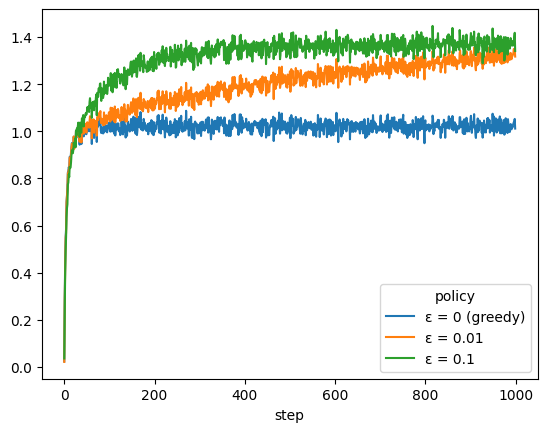

In [4]:
policy_names = {
    0: 'ε = 0.1',
    1: 'ε = 0.01',
    2: 'ε = 0 (greedy)'
}

(
    trace_df
    .assign(policy=trace_df.policy_idx.map(policy_names))
    .groupby(['step', 'policy'])
    ['reward'].mean()
    .unstack()
    .plot()
)


## Controlling the evaluation loop

The `bandit.evaluate` function is useful for benchmarking. But in practice, you'll want to have control over your bandit policy. Indeed you'll want the freedom to pull arms (with the `pull` method) and update the policy (with the `update` method) at your discretion.

As an example, the following is a possible reimplementation of the `bandit.evaluate` function. Here we'll be measuring the rate at which each policy selects the optimal arm.

Note how the `pull` and `update` methods are used.

In [5]:
import copy

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)
n_episodes = 2000

trace = []

with tqdm(total=len(policies) * n_episodes * env._max_episode_steps, position=0) as progress:
    for policy in policies:
        for episode in range(n_episodes):
            episode_policy = policy.clone()
            episode_env = copy.deepcopy(env)
            episode_env.reset()
            step = 0
            while True:
                action = episode_policy.pull(range(episode_env.action_space.n))
                observation, reward, terminated, truncated, info = episode_env.step(action)
                best_action = observation
                episode_policy.update(action, reward)

                trace.append({
                    "episode": episode,
                    "step": step,
                    "policy": f"ε = {policy.epsilon}",
                    "is_action_optimal": action == best_action
                })
                step += 1
                progress.update()

                if terminated or truncated:
                    break

trace_df = pd.DataFrame(trace)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 10001/6000000 [00:00<01:00, 99622.23it/s]

  0%|          | 20189/6000000 [00:00<00:59, 100946.14it/s]

  1%|          | 30381/6000000 [00:00<00:58, 101388.82it/s]

  1%|          | 40565/6000000 [00:00<00:58, 101563.25it/s]

  1%|          | 50784/6000000 [00:00<00:58, 101788.08it/s]

  1%|          | 61001/6000000 [00:00<00:58, 101801.93it/s]

  1%|          | 71182/6000000 [00:00<00:58, 101794.14it/s]

  1%|▏         | 81434/6000000 [00:00<00:58, 102024.23it/s]

  2%|▏         | 91637/6000000 [00:00<00:57, 102017.55it/s]

  2%|▏         | 101839/6000000 [00:01<00:57, 101928.20it/s]

  2%|▏         | 112032/6000000 [00:01<00:57, 101897.35it/s]

  2%|▏         | 122270/6000000 [00:01<00:57, 102043.27it/s]

  2%|▏         | 132535/6000000 [00:01<00:57, 102224.12it/s]

  2%|▏         | 142768/6000000 [00:01<00:57, 102253.39it/s]

  3%|▎         | 152994/6000000 [00:01<00:57, 102222.00it/s]

  3%|▎         | 163217/6000000 [00:01<00:57, 101690.92it/s]

  3%|▎         | 173461/6000000 [00:01<00:57, 101914.21it/s]

  3%|▎         | 183717/6000000 [00:01<00:56, 102105.12it/s]

  3%|▎         | 193942/6000000 [00:01<00:56, 102145.81it/s]

  3%|▎         | 204157/6000000 [00:02<00:57, 100302.78it/s]

  4%|▎         | 214405/6000000 [00:02<00:57, 100944.76it/s]

  4%|▎         | 224734/6000000 [00:02<00:56, 101640.92it/s]

  4%|▍         | 234977/6000000 [00:02<00:56, 101875.42it/s]

  4%|▍         | 245169/6000000 [00:02<00:56, 101661.19it/s]

  4%|▍         | 255424/6000000 [00:02<00:56, 101925.07it/s]

  4%|▍         | 265665/6000000 [00:02<00:56, 102067.69it/s]

  5%|▍         | 275900/6000000 [00:02<00:56, 102149.73it/s]

  5%|▍         | 286116/6000000 [00:02<00:56, 102016.47it/s]

  5%|▍         | 296320/6000000 [00:02<00:55, 102021.65it/s]

  5%|▌         | 306523/6000000 [00:03<00:55, 102006.11it/s]

  5%|▌         | 316724/6000000 [00:03<00:55, 102002.93it/s]

  5%|▌         | 326925/6000000 [00:03<00:55, 101899.63it/s]

  6%|▌         | 337116/6000000 [00:03<00:55, 101700.88it/s]

  6%|▌         | 347318/6000000 [00:03<00:55, 101794.61it/s]

  6%|▌         | 357551/6000000 [00:03<00:55, 101953.32it/s]

  6%|▌         | 367775/6000000 [00:03<00:55, 102038.16it/s]

  6%|▋         | 377979/6000000 [00:03<00:55, 102003.17it/s]

  6%|▋         | 388180/6000000 [00:03<00:55, 101830.00it/s]

  7%|▋         | 398394/6000000 [00:03<00:54, 101922.72it/s]

  7%|▋         | 408587/6000000 [00:04<00:54, 101818.08it/s]

  7%|▋         | 418769/6000000 [00:04<00:54, 101710.25it/s]

  7%|▋         | 428950/6000000 [00:04<00:54, 101739.20it/s]

  7%|▋         | 439124/6000000 [00:04<00:54, 101510.05it/s]

  7%|▋         | 449276/6000000 [00:04<00:54, 101484.02it/s]

  8%|▊         | 459425/6000000 [00:04<00:54, 100893.37it/s]

  8%|▊         | 469576/6000000 [00:04<00:54, 101075.94it/s]

  8%|▊         | 479746/6000000 [00:04<00:54, 101259.66it/s]

  8%|▊         | 489933/6000000 [00:04<00:54, 101439.54it/s]

  8%|▊         | 500078/6000000 [00:04<00:54, 101429.23it/s]

  9%|▊         | 510222/6000000 [00:05<00:54, 99938.03it/s] 

  9%|▊         | 520442/6000000 [00:05<00:54, 100607.73it/s]

  9%|▉         | 530672/6000000 [00:05<00:54, 101109.59it/s]

  9%|▉         | 540896/6000000 [00:05<00:53, 101445.18it/s]

  9%|▉         | 551044/6000000 [00:05<00:53, 101361.95it/s]

  9%|▉         | 561258/6000000 [00:05<00:53, 101593.80it/s]

 10%|▉         | 571469/6000000 [00:05<00:53, 101745.49it/s]

 10%|▉         | 581670/6000000 [00:05<00:53, 101824.30it/s]

 10%|▉         | 591887/6000000 [00:05<00:53, 101925.73it/s]

 10%|█         | 602081/6000000 [00:05<00:53, 101662.38it/s]

 10%|█         | 612248/6000000 [00:06<00:53, 101485.69it/s]

 10%|█         | 622435/6000000 [00:06<00:52, 101598.65it/s]

 11%|█         | 632653/6000000 [00:06<00:52, 101770.32it/s]

 11%|█         | 642831/6000000 [00:06<00:52, 101148.01it/s]

 11%|█         | 653001/6000000 [00:06<00:52, 101270.39it/s]

 11%|█         | 663274/6000000 [00:06<00:52, 101704.72it/s]

 11%|█         | 673525/6000000 [00:06<00:52, 101945.36it/s]

 11%|█▏        | 683766/6000000 [00:06<00:52, 102081.81it/s]

 12%|█▏        | 694001/6000000 [00:06<00:51, 102094.66it/s]

 12%|█▏        | 704253/6000000 [00:06<00:51, 102219.69it/s]

 12%|█▏        | 714476/6000000 [00:07<00:52, 100417.51it/s]

 12%|█▏        | 724635/6000000 [00:07<00:52, 100762.60it/s]

 12%|█▏        | 734852/6000000 [00:07<00:52, 101179.08it/s]

 12%|█▏        | 745001/6000000 [00:07<00:51, 101253.21it/s]

 13%|█▎        | 755182/6000000 [00:07<00:51, 101416.97it/s]

 13%|█▎        | 765354/6000000 [00:07<00:51, 101506.95it/s]

 13%|█▎        | 775542/6000000 [00:07<00:51, 101617.11it/s]

 13%|█▎        | 785738/6000000 [00:07<00:51, 101719.62it/s]

 13%|█▎        | 795949/6000000 [00:07<00:51, 101834.38it/s]

 13%|█▎        | 806134/6000000 [00:07<00:51, 101732.94it/s]

 14%|█▎        | 816308/6000000 [00:08<00:51, 100173.58it/s]

 14%|█▍        | 826532/6000000 [00:08<00:51, 100786.07it/s]

 14%|█▍        | 836735/6000000 [00:08<00:51, 101155.78it/s]

 14%|█▍        | 846902/6000000 [00:08<00:50, 101307.24it/s]

 14%|█▍        | 857052/6000000 [00:08<00:50, 101362.12it/s]

 14%|█▍        | 867271/6000000 [00:08<00:50, 101608.42it/s]

 15%|█▍        | 877441/6000000 [00:08<00:50, 101634.78it/s]

 15%|█▍        | 887629/6000000 [00:08<00:50, 101706.96it/s]

 15%|█▍        | 897851/6000000 [00:08<00:50, 101859.51it/s]

 15%|█▌        | 908038/6000000 [00:08<00:50, 101538.78it/s]

 15%|█▌        | 918193/6000000 [00:09<00:50, 101473.04it/s]

 15%|█▌        | 928446/6000000 [00:09<00:49, 101787.30it/s]

 16%|█▌        | 938699/6000000 [00:09<00:49, 102008.52it/s]

 16%|█▌        | 948953/6000000 [00:09<00:49, 102164.96it/s]

 16%|█▌        | 959170/6000000 [00:09<00:49, 102082.39it/s]

 16%|█▌        | 969412/6000000 [00:09<00:49, 102183.00it/s]

 16%|█▋        | 979631/6000000 [00:09<00:49, 102101.28it/s]

 16%|█▋        | 989842/6000000 [00:09<00:49, 102013.92it/s]

 17%|█▋        | 1000044/6000000 [00:09<00:49, 101949.94it/s]

 17%|█▋        | 1010240/6000000 [00:09<00:48, 101869.09it/s]

 17%|█▋        | 1020432/6000000 [00:10<00:48, 101884.08it/s]

 17%|█▋        | 1030621/6000000 [00:10<00:48, 101809.87it/s]

 17%|█▋        | 1040829/6000000 [00:10<00:48, 101889.74it/s]

 18%|█▊        | 1051019/6000000 [00:10<00:48, 101791.08it/s]

 18%|█▊        | 1061199/6000000 [00:10<00:48, 101787.46it/s]

 18%|█▊        | 1071418/6000000 [00:10<00:48, 101905.80it/s]

 18%|█▊        | 1081638/6000000 [00:10<00:48, 101991.62it/s]

 18%|█▊        | 1091904/6000000 [00:10<00:48, 102190.89it/s]

 18%|█▊        | 1102124/6000000 [00:10<00:47, 102078.85it/s]

 19%|█▊        | 1112355/6000000 [00:10<00:47, 102147.05it/s]

 19%|█▊        | 1122587/6000000 [00:11<00:47, 102196.08it/s]

 19%|█▉        | 1132807/6000000 [00:11<00:47, 102069.96it/s]

 19%|█▉        | 1143015/6000000 [00:11<00:47, 101814.50it/s]

 19%|█▉        | 1153282/6000000 [00:11<00:47, 102068.68it/s]

 19%|█▉        | 1163490/6000000 [00:11<00:47, 101992.00it/s]

 20%|█▉        | 1173690/6000000 [00:11<00:47, 101943.05it/s]

 20%|█▉        | 1183885/6000000 [00:11<00:47, 101907.90it/s]

 20%|█▉        | 1194076/6000000 [00:11<00:47, 101637.20it/s]

 20%|██        | 1204240/6000000 [00:11<00:47, 101381.81it/s]

 20%|██        | 1214379/6000000 [00:11<00:47, 101025.00it/s]

 20%|██        | 1224482/6000000 [00:12<00:47, 100866.25it/s]

 21%|██        | 1234569/6000000 [00:12<00:48, 99081.71it/s] 

 21%|██        | 1244583/6000000 [00:12<00:47, 99393.11it/s]

 21%|██        | 1254528/6000000 [00:12<00:47, 98979.30it/s]

 21%|██        | 1264541/6000000 [00:12<00:47, 99320.39it/s]

 21%|██        | 1274639/6000000 [00:12<00:47, 99813.11it/s]

 21%|██▏       | 1284647/6000000 [00:12<00:47, 99891.50it/s]

 22%|██▏       | 1294704/6000000 [00:12<00:47, 100093.89it/s]

 22%|██▏       | 1304717/6000000 [00:12<00:46, 100104.22it/s]

 22%|██▏       | 1314770/6000000 [00:12<00:46, 100230.82it/s]

 22%|██▏       | 1324849/6000000 [00:13<00:46, 100398.17it/s]

 22%|██▏       | 1334890/6000000 [00:13<00:47, 98506.82it/s] 

 22%|██▏       | 1344919/6000000 [00:13<00:47, 99031.98it/s]

 23%|██▎       | 1354903/6000000 [00:13<00:46, 99269.09it/s]

 23%|██▎       | 1364928/6000000 [00:13<00:46, 99561.29it/s]

 23%|██▎       | 1374994/6000000 [00:13<00:46, 99887.98it/s]

 23%|██▎       | 1385001/6000000 [00:13<00:46, 99894.22it/s]

 23%|██▎       | 1395045/6000000 [00:13<00:46, 100055.04it/s]

 23%|██▎       | 1405052/6000000 [00:13<00:45, 99985.96it/s] 

 24%|██▎       | 1415052/6000000 [00:13<00:45, 99963.00it/s]

 24%|██▍       | 1425060/6000000 [00:14<00:45, 99995.15it/s]

 24%|██▍       | 1435060/6000000 [00:14<00:46, 98248.15it/s]

 24%|██▍       | 1445050/6000000 [00:14<00:46, 98734.83it/s]

 24%|██▍       | 1455073/6000000 [00:14<00:45, 99179.22it/s]

 24%|██▍       | 1465153/6000000 [00:14<00:45, 99662.06it/s]

 25%|██▍       | 1475230/6000000 [00:14<00:45, 99991.54it/s]

 25%|██▍       | 1485232/6000000 [00:14<00:45, 99956.32it/s]

 25%|██▍       | 1495269/6000000 [00:14<00:45, 100078.50it/s]

 25%|██▌       | 1505279/6000000 [00:14<00:44, 99945.67it/s] 

 25%|██▌       | 1515311/6000000 [00:14<00:44, 100056.82it/s]

 25%|██▌       | 1525351/6000000 [00:15<00:44, 100158.21it/s]

 26%|██▌       | 1535368/6000000 [00:15<00:45, 97950.20it/s] 

 26%|██▌       | 1545416/6000000 [00:15<00:45, 98694.35it/s]

 26%|██▌       | 1555519/6000000 [00:15<00:44, 99385.40it/s]

 26%|██▌       | 1565585/6000000 [00:15<00:44, 99762.80it/s]

 26%|██▋       | 1575666/6000000 [00:15<00:44, 100074.13it/s]

 26%|██▋       | 1585678/6000000 [00:15<00:44, 100052.51it/s]

 27%|██▋       | 1595717/6000000 [00:15<00:43, 100153.12it/s]

 27%|██▋       | 1605779/6000000 [00:15<00:43, 100292.34it/s]

 27%|██▋       | 1615827/6000000 [00:15<00:43, 100345.86it/s]

 27%|██▋       | 1625903/6000000 [00:16<00:43, 100469.21it/s]

 27%|██▋       | 1635951/6000000 [00:16<00:43, 100187.27it/s]

 27%|██▋       | 1645971/6000000 [00:16<00:43, 100176.38it/s]

 28%|██▊       | 1655995/6000000 [00:16<00:43, 100194.03it/s]

 28%|██▊       | 1666015/6000000 [00:16<00:43, 100130.05it/s]

 28%|██▊       | 1676106/6000000 [00:16<00:43, 100362.45it/s]

 28%|██▊       | 1686143/6000000 [00:16<00:43, 100302.89it/s]

 28%|██▊       | 1696183/6000000 [00:16<00:42, 100330.15it/s]

 28%|██▊       | 1706217/6000000 [00:16<00:42, 100327.61it/s]

 29%|██▊       | 1716263/6000000 [00:16<00:42, 100364.97it/s]

 29%|██▉       | 1726300/6000000 [00:17<00:42, 100336.88it/s]

 29%|██▉       | 1736334/6000000 [00:17<00:43, 98740.91it/s] 

 29%|██▉       | 1746364/6000000 [00:17<00:42, 99202.42it/s]

 29%|██▉       | 1756375/6000000 [00:17<00:42, 99471.45it/s]

 29%|██▉       | 1766360/6000000 [00:17<00:42, 99581.78it/s]

 30%|██▉       | 1776443/6000000 [00:17<00:42, 99952.06it/s]

 30%|██▉       | 1786516/6000000 [00:17<00:42, 100184.74it/s]

 30%|██▉       | 1796601/6000000 [00:17<00:41, 100382.02it/s]

 30%|███       | 1806675/6000000 [00:17<00:41, 100486.63it/s]

 30%|███       | 1816725/6000000 [00:17<00:41, 100385.66it/s]

 30%|███       | 1826769/6000000 [00:18<00:41, 100401.10it/s]

 31%|███       | 1836810/6000000 [00:18<00:42, 98137.71it/s] 

 31%|███       | 1846636/6000000 [00:18<00:42, 98157.66it/s]

 31%|███       | 1856460/6000000 [00:18<00:42, 96960.63it/s]

 31%|███       | 1866550/6000000 [00:18<00:42, 98121.01it/s]

 31%|███▏      | 1876601/6000000 [00:18<00:41, 98829.02it/s]

 31%|███▏      | 1886643/6000000 [00:18<00:41, 99300.85it/s]

 32%|███▏      | 1896649/6000000 [00:18<00:41, 99526.08it/s]

 32%|███▏      | 1906631/6000000 [00:18<00:41, 99613.85it/s]

 32%|███▏      | 1916595/6000000 [00:18<00:41, 99066.02it/s]

 32%|███▏      | 1926611/6000000 [00:19<00:40, 99391.59it/s]

 32%|███▏      | 1936608/6000000 [00:19<00:40, 99562.22it/s]

 32%|███▏      | 1946615/6000000 [00:19<00:40, 99711.79it/s]

 33%|███▎      | 1956670/6000000 [00:19<00:40, 99960.83it/s]

 33%|███▎      | 1966667/6000000 [00:19<00:40, 99871.24it/s]

 33%|███▎      | 1976703/6000000 [00:19<00:40, 100016.58it/s]

 33%|███▎      | 1986712/6000000 [00:19<00:40, 100037.68it/s]

 33%|███▎      | 1996754/6000000 [00:19<00:39, 100150.95it/s]

 33%|███▎      | 2006770/6000000 [00:19<00:40, 98383.61it/s] 

 34%|███▎      | 2016616/6000000 [00:20<00:40, 97407.97it/s]

 34%|███▍      | 2026363/6000000 [00:20<00:41, 96007.28it/s]

 34%|███▍      | 2035971/6000000 [00:20<00:44, 89241.44it/s]

 34%|███▍      | 2045277/6000000 [00:20<00:43, 90310.91it/s]

 34%|███▍      | 2054797/6000000 [00:20<00:43, 91709.26it/s]

 34%|███▍      | 2064211/6000000 [00:20<00:42, 92412.73it/s]

 35%|███▍      | 2073626/6000000 [00:20<00:42, 92921.16it/s]

 35%|███▍      | 2083075/6000000 [00:20<00:41, 93382.49it/s]

 35%|███▍      | 2092467/6000000 [00:20<00:41, 93539.25it/s]

 35%|███▌      | 2101895/6000000 [00:20<00:41, 93756.96it/s]

 35%|███▌      | 2111282/6000000 [00:21<00:41, 93748.17it/s]

 35%|███▌      | 2120732/6000000 [00:21<00:41, 93970.22it/s]

 36%|███▌      | 2130135/6000000 [00:21<00:41, 93829.49it/s]

 36%|███▌      | 2139572/6000000 [00:21<00:41, 93990.59it/s]

 36%|███▌      | 2148974/6000000 [00:21<00:41, 93827.69it/s]

 36%|███▌      | 2158403/6000000 [00:21<00:40, 93963.39it/s]

 36%|███▌      | 2167894/6000000 [00:21<00:40, 94244.53it/s]

 36%|███▋      | 2177320/6000000 [00:21<00:40, 94237.14it/s]

 36%|███▋      | 2186780/6000000 [00:21<00:40, 94343.61it/s]

 37%|███▋      | 2196215/6000000 [00:21<00:40, 94182.19it/s]

 37%|███▋      | 2205645/6000000 [00:22<00:40, 94216.89it/s]

 37%|███▋      | 2215067/6000000 [00:22<00:40, 94099.81it/s]

 37%|███▋      | 2224478/6000000 [00:22<00:41, 92078.54it/s]

 37%|███▋      | 2233909/6000000 [00:22<00:40, 92736.85it/s]

 37%|███▋      | 2243383/6000000 [00:22<00:40, 93328.20it/s]

 38%|███▊      | 2252854/6000000 [00:22<00:39, 93738.01it/s]

 38%|███▊      | 2262390/6000000 [00:22<00:39, 94220.65it/s]

 38%|███▊      | 2271818/6000000 [00:22<00:39, 94237.61it/s]

 38%|███▊      | 2281245/6000000 [00:22<00:39, 93760.41it/s]

 38%|███▊      | 2290801/6000000 [00:22<00:39, 94294.95it/s]

 38%|███▊      | 2300248/6000000 [00:23<00:39, 94346.08it/s]

 38%|███▊      | 2309684/6000000 [00:23<00:39, 93995.27it/s]

 39%|███▊      | 2319085/6000000 [00:23<00:40, 91929.11it/s]

 39%|███▉      | 2328478/6000000 [00:23<00:39, 92516.49it/s]

 39%|███▉      | 2337938/6000000 [00:23<00:39, 93131.63it/s]

 39%|███▉      | 2347281/6000000 [00:23<00:39, 93218.35it/s]

 39%|███▉      | 2356777/6000000 [00:23<00:38, 93735.47it/s]

 39%|███▉      | 2366155/6000000 [00:23<00:39, 93025.48it/s]

 40%|███▉      | 2375500/6000000 [00:23<00:38, 93150.77it/s]

 40%|███▉      | 2384996/6000000 [00:23<00:38, 93690.01it/s]

 40%|███▉      | 2394368/6000000 [00:24<00:38, 93593.34it/s]

 40%|████      | 2403729/6000000 [00:24<00:38, 93488.63it/s]

 40%|████      | 2413079/6000000 [00:24<00:38, 93217.44it/s]

 40%|████      | 2422492/6000000 [00:24<00:38, 93487.42it/s]

 41%|████      | 2431901/6000000 [00:24<00:38, 93666.91it/s]

 41%|████      | 2441269/6000000 [00:24<00:38, 93591.24it/s]

 41%|████      | 2450648/6000000 [00:24<00:37, 93648.09it/s]

 41%|████      | 2460014/6000000 [00:24<00:37, 93625.21it/s]

 41%|████      | 2469377/6000000 [00:24<00:37, 93529.52it/s]

 41%|████▏     | 2478838/6000000 [00:24<00:37, 93853.04it/s]

 41%|████▏     | 2488239/6000000 [00:25<00:37, 93898.96it/s]

 42%|████▏     | 2497630/6000000 [00:25<00:37, 93807.16it/s]

 42%|████▏     | 2507011/6000000 [00:25<00:37, 92742.60it/s]

 42%|████▏     | 2516525/6000000 [00:25<00:37, 93453.62it/s]

 42%|████▏     | 2525952/6000000 [00:25<00:37, 93695.77it/s]

 42%|████▏     | 2535324/6000000 [00:25<00:37, 93297.75it/s]

 42%|████▏     | 2544656/6000000 [00:25<00:37, 93213.63it/s]

 43%|████▎     | 2554001/6000000 [00:25<00:36, 93151.55it/s]

 43%|████▎     | 2563469/6000000 [00:25<00:36, 93606.07it/s]

 43%|████▎     | 2572910/6000000 [00:25<00:36, 93845.71it/s]

 43%|████▎     | 2582296/6000000 [00:26<00:36, 93646.98it/s]

 43%|████▎     | 2591662/6000000 [00:26<00:36, 93391.38it/s]

 43%|████▎     | 2601046/6000000 [00:26<00:36, 93524.11it/s]

 44%|████▎     | 2610438/6000000 [00:26<00:36, 93641.76it/s]

 44%|████▎     | 2619803/6000000 [00:26<00:36, 93486.43it/s]

 44%|████▍     | 2629152/6000000 [00:26<00:36, 93345.35it/s]

 44%|████▍     | 2638640/6000000 [00:26<00:35, 93802.71it/s]

 44%|████▍     | 2648036/6000000 [00:26<00:35, 93847.62it/s]

 44%|████▍     | 2657539/6000000 [00:26<00:35, 94199.49it/s]

 44%|████▍     | 2666960/6000000 [00:26<00:35, 94009.35it/s]

 45%|████▍     | 2676362/6000000 [00:27<00:35, 93408.56it/s]

 45%|████▍     | 2685717/6000000 [00:27<00:35, 93448.97it/s]

 45%|████▍     | 2695063/6000000 [00:27<00:35, 93256.42it/s]

 45%|████▌     | 2704495/6000000 [00:27<00:35, 93571.91it/s]

 45%|████▌     | 2714001/6000000 [00:27<00:34, 93999.41it/s]

 45%|████▌     | 2723402/6000000 [00:27<00:34, 93893.73it/s]

 46%|████▌     | 2732792/6000000 [00:27<00:34, 93828.88it/s]

 46%|████▌     | 2742176/6000000 [00:27<00:34, 93650.78it/s]

 46%|████▌     | 2751542/6000000 [00:27<00:34, 93539.55it/s]

 46%|████▌     | 2761001/6000000 [00:27<00:34, 93818.68it/s]

 46%|████▌     | 2770489/6000000 [00:28<00:34, 94135.03it/s]

 46%|████▋     | 2779903/6000000 [00:28<00:34, 93761.86it/s]

 46%|████▋     | 2789387/6000000 [00:28<00:34, 94081.18it/s]

 47%|████▋     | 2798855/6000000 [00:28<00:33, 94257.47it/s]

 47%|████▋     | 2808282/6000000 [00:28<00:34, 93812.49it/s]

 47%|████▋     | 2817706/6000000 [00:28<00:33, 93940.03it/s]

 47%|████▋     | 2827101/6000000 [00:28<00:33, 93842.82it/s]

 47%|████▋     | 2836486/6000000 [00:28<00:33, 93800.12it/s]

 47%|████▋     | 2845867/6000000 [00:28<00:33, 93718.45it/s]

 48%|████▊     | 2855240/6000000 [00:28<00:33, 93314.63it/s]

 48%|████▊     | 2864662/6000000 [00:29<00:33, 93583.79it/s]

 48%|████▊     | 2874109/6000000 [00:29<00:33, 93845.59it/s]

 48%|████▊     | 2883524/6000000 [00:29<00:33, 93935.25it/s]

 48%|████▊     | 2892918/6000000 [00:29<00:33, 93612.63it/s]

 48%|████▊     | 2902440/6000000 [00:29<00:32, 94090.93it/s]

 49%|████▊     | 2911923/6000000 [00:29<00:32, 94308.76it/s]

 49%|████▊     | 2921469/6000000 [00:29<00:32, 94652.80it/s]

 49%|████▉     | 2931026/6000000 [00:29<00:32, 94927.43it/s]

 49%|████▉     | 2940520/6000000 [00:29<00:32, 94584.95it/s]

 49%|████▉     | 2949979/6000000 [00:29<00:32, 94333.59it/s]

 49%|████▉     | 2959413/6000000 [00:30<00:32, 93998.00it/s]

 49%|████▉     | 2968814/6000000 [00:30<00:32, 93818.00it/s]

 50%|████▉     | 2978317/6000000 [00:30<00:32, 94178.15it/s]

 50%|████▉     | 2987736/6000000 [00:30<00:32, 91383.55it/s]

 50%|████▉     | 2997066/6000000 [00:30<00:32, 91944.75it/s]

 50%|█████     | 3006480/6000000 [00:30<00:32, 92591.41it/s]

 50%|█████     | 3015776/6000000 [00:30<00:32, 92699.15it/s]

 50%|█████     | 3025164/6000000 [00:30<00:31, 93048.02it/s]

 51%|█████     | 3034567/6000000 [00:30<00:31, 93338.48it/s]

 51%|█████     | 3043905/6000000 [00:30<00:31, 93268.66it/s]

 51%|█████     | 3053235/6000000 [00:31<00:31, 92781.07it/s]

 51%|█████     | 3062632/6000000 [00:31<00:31, 93134.32it/s]

 51%|█████     | 3072001/6000000 [00:31<00:31, 93226.37it/s]

 51%|█████▏    | 3081325/6000000 [00:31<00:32, 91001.63it/s]

 52%|█████▏    | 3090817/6000000 [00:31<00:31, 92152.55it/s]

 52%|█████▏    | 3100090/6000000 [00:31<00:31, 92322.67it/s]

 52%|█████▏    | 3109489/6000000 [00:31<00:31, 92817.51it/s]

 52%|█████▏    | 3118926/6000000 [00:31<00:30, 93279.75it/s]

 52%|█████▏    | 3128325/6000000 [00:31<00:30, 93491.18it/s]

 52%|█████▏    | 3137703/6000000 [00:32<00:30, 93575.63it/s]

 52%|█████▏    | 3147191/6000000 [00:32<00:30, 93965.25it/s]

 53%|█████▎    | 3156798/6000000 [00:32<00:30, 94594.92it/s]

 53%|█████▎    | 3166259/6000000 [00:32<00:30, 94276.97it/s]

 53%|█████▎    | 3175688/6000000 [00:32<00:30, 93995.14it/s]

 53%|█████▎    | 3185142/6000000 [00:32<00:29, 94155.43it/s]

 53%|█████▎    | 3194715/6000000 [00:32<00:29, 94624.62it/s]

 53%|█████▎    | 3204179/6000000 [00:32<00:29, 94352.28it/s]

 54%|█████▎    | 3213801/6000000 [00:32<00:29, 94909.34it/s]

 54%|█████▎    | 3223293/6000000 [00:32<00:29, 94732.77it/s]

 54%|█████▍    | 3232767/6000000 [00:33<00:29, 94633.07it/s]

 54%|█████▍    | 3242231/6000000 [00:33<00:29, 94240.71it/s]

 54%|█████▍    | 3251656/6000000 [00:33<00:29, 94079.47it/s]

 54%|█████▍    | 3261065/6000000 [00:33<00:29, 93757.05it/s]

 55%|█████▍    | 3270442/6000000 [00:33<00:29, 92128.92it/s]

 55%|█████▍    | 3279838/6000000 [00:33<00:29, 92668.77it/s]

 55%|█████▍    | 3289342/6000000 [00:33<00:29, 93371.19it/s]

 55%|█████▍    | 3298684/6000000 [00:33<00:28, 93372.89it/s]

 55%|█████▌    | 3308025/6000000 [00:33<00:28, 93151.26it/s]

 55%|█████▌    | 3317619/6000000 [00:33<00:28, 93981.16it/s]

 55%|█████▌    | 3327146/6000000 [00:34<00:28, 94363.85it/s]

 56%|█████▌    | 3336584/6000000 [00:34<00:28, 93982.42it/s]

 56%|█████▌    | 3346046/6000000 [00:34<00:28, 94172.32it/s]

 56%|█████▌    | 3355465/6000000 [00:34<00:28, 94174.81it/s]

 56%|█████▌    | 3364884/6000000 [00:34<00:28, 91991.90it/s]

 56%|█████▌    | 3374234/6000000 [00:34<00:28, 92435.02it/s]

 56%|█████▋    | 3383637/6000000 [00:34<00:28, 92904.71it/s]

 57%|█████▋    | 3393001/6000000 [00:34<00:27, 93122.75it/s]

 57%|█████▋    | 3402499/6000000 [00:34<00:27, 93675.18it/s]

 57%|█████▋    | 3411984/6000000 [00:34<00:27, 94024.36it/s]

 57%|█████▋    | 3421421/6000000 [00:35<00:27, 94124.80it/s]

 57%|█████▋    | 3430881/6000000 [00:35<00:27, 94264.85it/s]

 57%|█████▋    | 3440309/6000000 [00:35<00:27, 94211.69it/s]

 57%|█████▋    | 3449869/6000000 [00:35<00:26, 94626.56it/s]

 58%|█████▊    | 3459333/6000000 [00:35<00:27, 93574.07it/s]

 58%|█████▊    | 3468694/6000000 [00:35<00:27, 92921.97it/s]

 58%|█████▊    | 3478170/6000000 [00:35<00:26, 93466.96it/s]

 58%|█████▊    | 3487709/6000000 [00:35<00:26, 94037.71it/s]

 58%|█████▊    | 3497115/6000000 [00:35<00:26, 93867.63it/s]

 58%|█████▊    | 3506666/6000000 [00:35<00:26, 94357.58it/s]

 59%|█████▊    | 3516104/6000000 [00:36<00:26, 94287.44it/s]

 59%|█████▉    | 3525534/6000000 [00:36<00:26, 93989.17it/s]

 59%|█████▉    | 3535001/6000000 [00:36<00:26, 94113.60it/s]

 59%|█████▉    | 3544436/6000000 [00:36<00:26, 94183.61it/s]

 59%|█████▉    | 3553855/6000000 [00:36<00:26, 93285.65it/s]

 59%|█████▉    | 3563186/6000000 [00:36<00:27, 90248.48it/s]

 60%|█████▉    | 3572502/6000000 [00:36<00:26, 91094.46it/s]

 60%|█████▉    | 3581952/6000000 [00:36<00:26, 92095.17it/s]

 60%|█████▉    | 3591294/6000000 [00:36<00:26, 92485.42it/s]

 60%|██████    | 3600669/6000000 [00:36<00:25, 92860.51it/s]

 60%|██████    | 3610009/6000000 [00:37<00:25, 93013.57it/s]

 60%|██████    | 3619456/6000000 [00:37<00:25, 93447.18it/s]

 60%|██████    | 3628985/6000000 [00:37<00:25, 93995.48it/s]

 61%|██████    | 3638388/6000000 [00:37<00:25, 93885.60it/s]

 61%|██████    | 3647779/6000000 [00:37<00:25, 93779.47it/s]

 61%|██████    | 3657159/6000000 [00:37<00:25, 93689.67it/s]

 61%|██████    | 3666632/6000000 [00:37<00:24, 93999.30it/s]

 61%|██████▏   | 3676063/6000000 [00:37<00:24, 94092.03it/s]

 61%|██████▏   | 3685622/6000000 [00:37<00:24, 94538.64it/s]

 62%|██████▏   | 3695077/6000000 [00:37<00:24, 94415.64it/s]

 62%|██████▏   | 3704519/6000000 [00:38<00:24, 94089.41it/s]

 62%|██████▏   | 3714020/6000000 [00:38<00:24, 94363.16it/s]

 62%|██████▏   | 3723635/6000000 [00:38<00:23, 94896.96it/s]

 62%|██████▏   | 3733126/6000000 [00:38<00:23, 94729.63it/s]

 62%|██████▏   | 3742632/6000000 [00:38<00:23, 94825.88it/s]

 63%|██████▎   | 3752115/6000000 [00:38<00:24, 92492.72it/s]

 63%|██████▎   | 3761377/6000000 [00:38<00:24, 92427.25it/s]

 63%|██████▎   | 3770733/6000000 [00:38<00:24, 92761.15it/s]

 63%|██████▎   | 3780016/6000000 [00:38<00:23, 92727.25it/s]

 63%|██████▎   | 3789294/6000000 [00:38<00:23, 92486.87it/s]

 63%|██████▎   | 3798879/6000000 [00:39<00:23, 93486.63it/s]

 63%|██████▎   | 3808231/6000000 [00:39<00:23, 93186.82it/s]

 64%|██████▎   | 3817700/6000000 [00:39<00:23, 93632.60it/s]

 64%|██████▍   | 3827066/6000000 [00:39<00:23, 93556.71it/s]

 64%|██████▍   | 3836423/6000000 [00:39<00:23, 93524.44it/s]

 64%|██████▍   | 3845860/6000000 [00:39<00:22, 93774.51it/s]

 64%|██████▍   | 3855239/6000000 [00:39<00:22, 93409.75it/s]

 64%|██████▍   | 3864581/6000000 [00:39<00:22, 93318.84it/s]

 65%|██████▍   | 3874081/6000000 [00:39<00:22, 93819.81it/s]

 65%|██████▍   | 3883479/6000000 [00:39<00:22, 93866.43it/s]

 65%|██████▍   | 3892867/6000000 [00:40<00:22, 93554.91it/s]

 65%|██████▌   | 3902321/6000000 [00:40<00:22, 93847.93it/s]

 65%|██████▌   | 3911927/6000000 [00:40<00:22, 94509.29it/s]

 65%|██████▌   | 3921382/6000000 [00:40<00:21, 94519.21it/s]

 66%|██████▌   | 3930857/6000000 [00:40<00:21, 94588.25it/s]

 66%|██████▌   | 3940317/6000000 [00:40<00:22, 91398.21it/s]

 66%|██████▌   | 3949798/6000000 [00:40<00:22, 92396.45it/s]

 66%|██████▌   | 3959188/6000000 [00:40<00:21, 92837.80it/s]

 66%|██████▌   | 3968608/6000000 [00:40<00:21, 93240.19it/s]

 66%|██████▋   | 3978019/6000000 [00:40<00:21, 93498.27it/s]

 66%|██████▋   | 3987405/6000000 [00:41<00:21, 93604.56it/s]

 67%|██████▋   | 3996771/6000000 [00:41<00:21, 93216.96it/s]

 67%|██████▋   | 4006424/6000000 [00:41<00:21, 94202.94it/s]

 67%|██████▋   | 4016032/6000000 [00:41<00:20, 94760.41it/s]

 67%|██████▋   | 4025698/6000000 [00:41<00:20, 95327.94it/s]

 67%|██████▋   | 4035320/6000000 [00:41<00:20, 95594.00it/s]

 67%|██████▋   | 4045400/6000000 [00:41<00:20, 97151.94it/s]

 68%|██████▊   | 4055117/6000000 [00:41<00:20, 96326.71it/s]

 68%|██████▊   | 4064887/6000000 [00:41<00:20, 96735.13it/s]

 68%|██████▊   | 4074563/6000000 [00:41<00:19, 96481.66it/s]

 68%|██████▊   | 4084213/6000000 [00:42<00:19, 96324.79it/s]

 68%|██████▊   | 4093860/6000000 [00:42<00:19, 96366.59it/s]

 68%|██████▊   | 4103498/6000000 [00:42<00:19, 96328.60it/s]

 69%|██████▊   | 4113132/6000000 [00:42<00:19, 96060.89it/s]

 69%|██████▊   | 4122828/6000000 [00:42<00:19, 96329.00it/s]

 69%|██████▉   | 4132462/6000000 [00:42<00:19, 94679.61it/s]

 69%|██████▉   | 4142171/6000000 [00:42<00:19, 95390.11it/s]

 69%|██████▉   | 4151834/6000000 [00:42<00:19, 95756.96it/s]

 69%|██████▉   | 4161414/6000000 [00:42<00:19, 94520.22it/s]

 70%|██████▉   | 4170887/6000000 [00:43<00:19, 94579.70it/s]

 70%|██████▉   | 4180410/6000000 [00:43<00:19, 94770.27it/s]

 70%|██████▉   | 4190001/6000000 [00:43<00:19, 94980.92it/s]

 70%|██████▉   | 4199730/6000000 [00:43<00:18, 95668.49it/s]

 70%|███████   | 4209299/6000000 [00:43<00:18, 95523.34it/s]

 70%|███████   | 4218883/6000000 [00:43<00:18, 95615.20it/s]

 70%|███████   | 4228446/6000000 [00:43<00:18, 94394.04it/s]

 71%|███████   | 4238001/6000000 [00:43<00:18, 94582.42it/s]

 71%|███████   | 4247678/6000000 [00:43<00:18, 95231.44it/s]

 71%|███████   | 4257535/6000000 [00:43<00:18, 96225.93it/s]

 71%|███████   | 4267161/6000000 [00:44<00:18, 96072.20it/s]

 71%|███████▏  | 4276861/6000000 [00:44<00:17, 96347.67it/s]

 71%|███████▏  | 4286570/6000000 [00:44<00:17, 96568.49it/s]

 72%|███████▏  | 4296228/6000000 [00:44<00:17, 96048.41it/s]

 72%|███████▏  | 4305835/6000000 [00:44<00:17, 96031.93it/s]

 72%|███████▏  | 4315475/6000000 [00:44<00:17, 96139.41it/s]

 72%|███████▏  | 4325090/6000000 [00:44<00:18, 91807.44it/s]

 72%|███████▏  | 4334595/6000000 [00:44<00:17, 92745.94it/s]

 72%|███████▏  | 4344292/6000000 [00:44<00:17, 93982.03it/s]

 73%|███████▎  | 4353881/6000000 [00:44<00:17, 94542.45it/s]

 73%|███████▎  | 4363748/6000000 [00:45<00:17, 95765.19it/s]

 73%|███████▎  | 4373420/6000000 [00:45<00:16, 96046.67it/s]

 73%|███████▎  | 4383095/6000000 [00:45<00:16, 96253.99it/s]

 73%|███████▎  | 4392728/6000000 [00:45<00:16, 96177.73it/s]

 73%|███████▎  | 4402458/6000000 [00:45<00:16, 96513.15it/s]

 74%|███████▎  | 4412114/6000000 [00:45<00:16, 96090.71it/s]

 74%|███████▎  | 4421913/6000000 [00:45<00:16, 96655.02it/s]

 74%|███████▍  | 4431581/6000000 [00:45<00:17, 91973.55it/s]

 74%|███████▍  | 4441311/6000000 [00:45<00:16, 93511.53it/s]

 74%|███████▍  | 4451001/6000000 [00:45<00:16, 94400.50it/s]

 74%|███████▍  | 4460695/6000000 [00:46<00:16, 95146.32it/s]

 75%|███████▍  | 4470241/6000000 [00:46<00:16, 95237.17it/s]

 75%|███████▍  | 4479968/6000000 [00:46<00:15, 95839.21it/s]

 75%|███████▍  | 4489564/6000000 [00:46<00:15, 95508.88it/s]

 75%|███████▍  | 4499221/6000000 [00:46<00:15, 95823.95it/s]

 75%|███████▌  | 4508868/6000000 [00:46<00:15, 96014.94it/s]

 75%|███████▌  | 4518474/6000000 [00:46<00:15, 95716.64it/s]

 75%|███████▌  | 4528049/6000000 [00:46<00:15, 92469.05it/s]

 76%|███████▌  | 4537772/6000000 [00:46<00:15, 93857.58it/s]

 76%|███████▌  | 4547283/6000000 [00:46<00:15, 94225.27it/s]

 76%|███████▌  | 4556989/6000000 [00:47<00:15, 95063.73it/s]

 76%|███████▌  | 4566535/6000000 [00:47<00:15, 95180.22it/s]

 76%|███████▋  | 4576063/6000000 [00:47<00:14, 95207.68it/s]

 76%|███████▋  | 4585709/6000000 [00:47<00:14, 95580.94it/s]

 77%|███████▋  | 4595272/6000000 [00:47<00:14, 95546.66it/s]

 77%|███████▋  | 4604911/6000000 [00:47<00:14, 95798.87it/s]

 77%|███████▋  | 4614581/6000000 [00:47<00:14, 96068.04it/s]

 77%|███████▋  | 4624190/6000000 [00:47<00:14, 93165.14it/s]

 77%|███████▋  | 4633908/6000000 [00:47<00:14, 94340.91it/s]

 77%|███████▋  | 4643511/6000000 [00:47<00:14, 94839.02it/s]

 78%|███████▊  | 4653254/6000000 [00:48<00:14, 95605.91it/s]

 78%|███████▊  | 4662825/6000000 [00:48<00:14, 95489.32it/s]

 78%|███████▊  | 4672491/6000000 [00:48<00:13, 95837.03it/s]

 78%|███████▊  | 4682338/6000000 [00:48<00:13, 96622.56it/s]

 78%|███████▊  | 4692100/6000000 [00:48<00:13, 96918.78it/s]

 78%|███████▊  | 4701848/6000000 [00:48<00:13, 97085.89it/s]

 79%|███████▊  | 4711559/6000000 [00:48<00:13, 96903.46it/s]

 79%|███████▊  | 4721251/6000000 [00:48<00:13, 93563.59it/s]

 79%|███████▉  | 4730930/6000000 [00:48<00:13, 94503.94it/s]

 79%|███████▉  | 4740457/6000000 [00:48<00:13, 94729.15it/s]

 79%|███████▉  | 4750012/6000000 [00:49<00:13, 94970.35it/s]

 79%|███████▉  | 4759580/6000000 [00:49<00:13, 95179.98it/s]

 79%|███████▉  | 4769219/6000000 [00:49<00:12, 95538.23it/s]

 80%|███████▉  | 4778779/6000000 [00:49<00:12, 95555.82it/s]

 80%|███████▉  | 4788568/6000000 [00:49<00:12, 96252.23it/s]

 80%|███████▉  | 4798197/6000000 [00:49<00:12, 96052.02it/s]

 80%|████████  | 4807805/6000000 [00:49<00:12, 94117.35it/s]

 80%|████████  | 4817227/6000000 [00:49<00:12, 94041.74it/s]

 80%|████████  | 4826825/6000000 [00:49<00:12, 94614.88it/s]

 81%|████████  | 4836527/6000000 [00:49<00:12, 95328.90it/s]

 81%|████████  | 4846065/6000000 [00:50<00:12, 95341.32it/s]

 81%|████████  | 4855695/6000000 [00:50<00:11, 95626.63it/s]

 81%|████████  | 4865303/6000000 [00:50<00:11, 95761.64it/s]

 81%|████████  | 4874942/6000000 [00:50<00:11, 95948.68it/s]

 81%|████████▏ | 4884539/6000000 [00:50<00:11, 95651.92it/s]

 82%|████████▏ | 4894151/6000000 [00:50<00:11, 95791.03it/s]

 82%|████████▏ | 4903743/6000000 [00:50<00:11, 95828.90it/s]

 82%|████████▏ | 4913327/6000000 [00:50<00:11, 92265.32it/s]

 82%|████████▏ | 4922809/6000000 [00:50<00:11, 93010.58it/s]

 82%|████████▏ | 4932350/6000000 [00:51<00:11, 93716.28it/s]

 82%|████████▏ | 4941940/6000000 [00:51<00:11, 94360.35it/s]

 83%|████████▎ | 4951447/6000000 [00:51<00:11, 94567.61it/s]

 83%|████████▎ | 4961048/6000000 [00:51<00:10, 94995.40it/s]

 83%|████████▎ | 4970619/6000000 [00:51<00:10, 95208.51it/s]

 83%|████████▎ | 4980224/6000000 [00:51<00:10, 95458.31it/s]

 83%|████████▎ | 4989898/6000000 [00:51<00:10, 95841.53it/s]

 83%|████████▎ | 4999511/6000000 [00:51<00:10, 95926.72it/s]

 83%|████████▎ | 5009106/6000000 [00:51<00:10, 95158.85it/s]

 84%|████████▎ | 5018856/6000000 [00:51<00:10, 95855.44it/s]

 84%|████████▍ | 5028448/6000000 [00:52<00:10, 95874.27it/s]

 84%|████████▍ | 5038038/6000000 [00:52<00:10, 95802.42it/s]

 84%|████████▍ | 5047620/6000000 [00:52<00:09, 95769.11it/s]

 84%|████████▍ | 5057221/6000000 [00:52<00:09, 95838.85it/s]

 84%|████████▍ | 5066935/6000000 [00:52<00:09, 96226.88it/s]

 85%|████████▍ | 5076559/6000000 [00:52<00:09, 96103.75it/s]

 85%|████████▍ | 5086170/6000000 [00:52<00:09, 95819.59it/s]

 85%|████████▍ | 5095799/6000000 [00:52<00:09, 95958.09it/s]

 85%|████████▌ | 5105396/6000000 [00:52<00:09, 93934.71it/s]

 85%|████████▌ | 5114799/6000000 [00:52<00:09, 92516.73it/s]

 85%|████████▌ | 5124322/6000000 [00:53<00:09, 93310.07it/s]

 86%|████████▌ | 5133959/6000000 [00:53<00:09, 94210.88it/s]

 86%|████████▌ | 5143661/6000000 [00:53<00:09, 95043.88it/s]

 86%|████████▌ | 5153260/6000000 [00:53<00:08, 95323.97it/s]

 86%|████████▌ | 5162841/6000000 [00:53<00:08, 95465.81it/s]

 86%|████████▌ | 5172391/6000000 [00:53<00:08, 95404.68it/s]

 86%|████████▋ | 5181934/6000000 [00:53<00:08, 95409.36it/s]

 87%|████████▋ | 5191701/6000000 [00:53<00:08, 96083.62it/s]

 87%|████████▋ | 5201311/6000000 [00:53<00:08, 95945.50it/s]

 87%|████████▋ | 5210907/6000000 [00:53<00:08, 93167.77it/s]

 87%|████████▋ | 5220471/6000000 [00:54<00:08, 93890.99it/s]

 87%|████████▋ | 5230083/6000000 [00:54<00:08, 94547.89it/s]

 87%|████████▋ | 5240017/6000000 [00:54<00:07, 95968.91it/s]

 87%|████████▋ | 5249624/6000000 [00:54<00:07, 95968.24it/s]

 88%|████████▊ | 5259432/6000000 [00:54<00:07, 96597.90it/s]

 88%|████████▊ | 5269097/6000000 [00:54<00:07, 96179.54it/s]

 88%|████████▊ | 5278719/6000000 [00:54<00:07, 95867.17it/s]

 88%|████████▊ | 5288456/6000000 [00:54<00:07, 96313.20it/s]

 88%|████████▊ | 5298198/6000000 [00:54<00:07, 96643.68it/s]

 88%|████████▊ | 5307865/6000000 [00:54<00:07, 96066.32it/s]

 89%|████████▊ | 5317474/6000000 [00:55<00:07, 95825.67it/s]

 89%|████████▉ | 5327193/6000000 [00:55<00:06, 96231.37it/s]

 89%|████████▉ | 5336889/6000000 [00:55<00:06, 96447.78it/s]

 89%|████████▉ | 5346535/6000000 [00:55<00:06, 96142.23it/s]

 89%|████████▉ | 5356150/6000000 [00:55<00:06, 95637.97it/s]

 89%|████████▉ | 5365949/6000000 [00:55<00:06, 96336.21it/s]

 90%|████████▉ | 5375726/6000000 [00:55<00:06, 96763.62it/s]

 90%|████████▉ | 5385404/6000000 [00:55<00:06, 96482.91it/s]

 90%|████████▉ | 5395282/6000000 [00:55<00:06, 97166.32it/s]

 90%|█████████ | 5405000/6000000 [00:55<00:06, 96743.93it/s]

 90%|█████████ | 5414676/6000000 [00:56<00:06, 96303.58it/s]

 90%|█████████ | 5424359/6000000 [00:56<00:05, 96459.83it/s]

 91%|█████████ | 5434006/6000000 [00:56<00:05, 95988.18it/s]

 91%|█████████ | 5443607/6000000 [00:56<00:05, 95992.94it/s]

 91%|█████████ | 5453207/6000000 [00:56<00:05, 95891.05it/s]

 91%|█████████ | 5463012/6000000 [00:56<00:05, 96534.09it/s]

 91%|█████████ | 5472709/6000000 [00:56<00:05, 96664.10it/s]

 91%|█████████▏| 5482376/6000000 [00:56<00:05, 96596.53it/s]

 92%|█████████▏| 5492096/6000000 [00:56<00:05, 96776.42it/s]

 92%|█████████▏| 5501774/6000000 [00:56<00:05, 96194.65it/s]

 92%|█████████▏| 5511395/6000000 [00:57<00:05, 96011.39it/s]

 92%|█████████▏| 5521001/6000000 [00:57<00:04, 95993.06it/s]

 92%|█████████▏| 5530658/6000000 [00:57<00:04, 96164.22it/s]

 92%|█████████▏| 5540275/6000000 [00:57<00:04, 95873.60it/s]

 93%|█████████▎| 5550001/6000000 [00:57<00:04, 96092.72it/s]

 93%|█████████▎| 5559611/6000000 [00:57<00:04, 95923.23it/s]

 93%|█████████▎| 5569204/6000000 [00:57<00:04, 95620.57it/s]

 93%|█████████▎| 5578767/6000000 [00:57<00:04, 90519.89it/s]

 93%|█████████▎| 5588286/6000000 [00:57<00:04, 91860.97it/s]

 93%|█████████▎| 5597999/6000000 [00:57<00:04, 93395.12it/s]

 93%|█████████▎| 5607611/6000000 [00:58<00:04, 94193.04it/s]

 94%|█████████▎| 5617070/6000000 [00:58<00:04, 94308.35it/s]

 94%|█████████▍| 5626526/6000000 [00:58<00:03, 94381.89it/s]

 94%|█████████▍| 5635998/6000000 [00:58<00:03, 94481.74it/s]

 94%|█████████▍| 5645651/6000000 [00:58<00:03, 95090.47it/s]

 94%|█████████▍| 5655257/6000000 [00:58<00:03, 95378.89it/s]

 94%|█████████▍| 5664800/6000000 [00:58<00:03, 95328.51it/s]

 95%|█████████▍| 5674495/6000000 [00:58<00:03, 95811.63it/s]

 95%|█████████▍| 5684148/6000000 [00:58<00:03, 96024.22it/s]

 95%|█████████▍| 5693753/6000000 [00:58<00:03, 95705.95it/s]

 95%|█████████▌| 5703326/6000000 [00:59<00:03, 94996.98it/s]

 95%|█████████▌| 5712828/6000000 [00:59<00:03, 94982.42it/s]

 95%|█████████▌| 5722405/6000000 [00:59<00:02, 95214.74it/s]

 96%|█████████▌| 5732032/6000000 [00:59<00:02, 95529.39it/s]

 96%|█████████▌| 5741725/6000000 [00:59<00:02, 95947.04it/s]

 96%|█████████▌| 5751380/6000000 [00:59<00:02, 96126.72it/s]

 96%|█████████▌| 5761195/6000000 [00:59<00:02, 96731.27it/s]

 96%|█████████▌| 5770937/6000000 [00:59<00:02, 96937.66it/s]

 96%|█████████▋| 5780632/6000000 [00:59<00:02, 96384.51it/s]

 97%|█████████▋| 5790272/6000000 [00:59<00:02, 95639.52it/s]

 97%|█████████▋| 5799984/6000000 [01:00<00:02, 96077.49it/s]

 97%|█████████▋| 5809976/6000000 [01:00<00:01, 97222.96it/s]

 97%|█████████▋| 5819769/6000000 [01:00<00:01, 97432.39it/s]

 97%|█████████▋| 5829514/6000000 [01:00<00:01, 96896.57it/s]

 97%|█████████▋| 5839206/6000000 [01:00<00:01, 96166.33it/s]

 97%|█████████▋| 5848844/6000000 [01:00<00:01, 96227.46it/s]

 98%|█████████▊| 5858469/6000000 [01:00<00:01, 96045.74it/s]

 98%|█████████▊| 5868149/6000000 [01:00<00:01, 96268.68it/s]

 98%|█████████▊| 5877918/6000000 [01:00<00:01, 96692.39it/s]

 98%|█████████▊| 5887588/6000000 [01:00<00:01, 96060.71it/s]

 98%|█████████▊| 5897196/6000000 [01:01<00:01, 94992.06it/s]

 98%|█████████▊| 5906753/6000000 [01:01<00:00, 95162.22it/s]

 99%|█████████▊| 5916432/6000000 [01:01<00:00, 95645.33it/s]

 99%|█████████▉| 5926218/6000000 [01:01<00:00, 96303.25it/s]

 99%|█████████▉| 5936001/6000000 [01:01<00:00, 96648.84it/s]

 99%|█████████▉| 5945668/6000000 [01:01<00:00, 96501.04it/s]

 99%|█████████▉| 5955320/6000000 [01:01<00:00, 95918.49it/s]

 99%|█████████▉| 5964936/6000000 [01:01<00:00, 95990.19it/s]

100%|█████████▉| 5974536/6000000 [01:01<00:00, 95969.58it/s]

100%|█████████▉| 5984242/6000000 [01:01<00:00, 96293.57it/s]

100%|█████████▉| 5993975/6000000 [01:02<00:00, 96602.71it/s]

100%|██████████| 6000000/6000000 [01:02<00:00, 96526.27it/s]

<Axes: xlabel='step'>

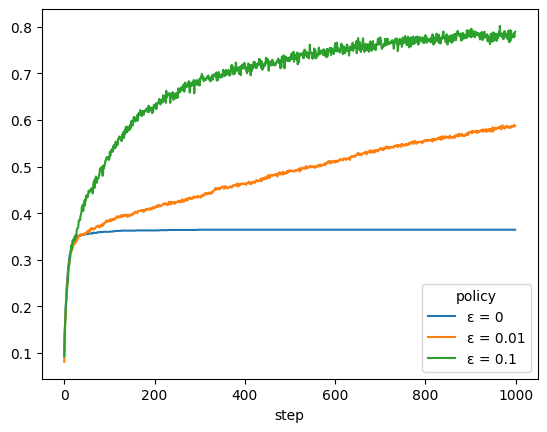

In [6]:
colors = {
    'ε = 0.1': 'tab:blue',
    'ε = 0.01': 'tab:red',
    'ε = 0': 'tab:green'
}

(
    trace_df
    .groupby(['step', 'policy'])
    ['is_action_optimal'].mean()
    .unstack()
    .plot()
)


## Handling drift

The environment used above is a toy situation used for introducing bandits. It is stationary, meaning that the expected reward of each arm does not change over time.

In practice, arms are dynamic, and their performance can vary over time. A simple example of this is the [Candy Cane Contest](https://www.kaggle.com/c/santa-2020) that was hosted on Kaggle in 2020. The expected reward of each arm diminishes each time it is pulled.

The way bandit policies in River deal with drift depends on the method. For the `bandit.EpsilonGreedy` policy, it makes sense to use a rolling average as the reward object. What this means is that the empirical reward the policy calculates for each arm is a rolling average, rather than a global one.

In [7]:
from river import proba, utils

policies=[
    bandit.EpsilonGreedy(
        epsilon=0.1,
        seed=42
    ),
    bandit.EpsilonGreedy(
        epsilon=0.3,
        reward_obj=utils.Rolling(stats.Mean(), window_size=50),
        seed=42
    ),
    bandit.ThompsonSampling(
        reward_obj=proba.Beta(),
        seed=42
    )
]

env = gym.make('river_bandits/CandyCaneContest-v0')

trace = bandit.evaluate(
    policies=policies,
    env=env,
    n_episodes=(n_episodes := 30),
    seed=42
)

trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))


  0%|          | 0/180000 [00:00<?, ?it/s]

  0%|          | 169/180000 [00:00<01:46, 1689.63it/s]

  1%|          | 966/180000 [00:00<00:33, 5377.33it/s]

  1%|          | 1712/180000 [00:00<00:28, 6327.43it/s]

  1%|▏         | 2463/180000 [00:00<00:26, 6786.86it/s]

  2%|▏         | 3209/180000 [00:00<00:25, 7028.94it/s]

  2%|▏         | 3954/180000 [00:00<00:24, 7170.37it/s]

  3%|▎         | 4701/180000 [00:00<00:24, 7263.99it/s]

  3%|▎         | 5448/180000 [00:00<00:23, 7325.46it/s]

  3%|▎         | 6181/180000 [00:00<00:24, 7125.00it/s]

  4%|▍         | 6970/180000 [00:01<00:23, 7355.79it/s]

  4%|▍         | 7713/180000 [00:01<00:23, 7371.98it/s]

  5%|▍         | 8452/180000 [00:01<00:23, 7371.18it/s]

  5%|▌         | 9195/180000 [00:01<00:23, 7386.64it/s]

  6%|▌         | 9936/180000 [00:01<00:23, 7390.59it/s]

  6%|▌         | 10676/180000 [00:01<00:22, 7388.12it/s]

  6%|▋         | 11416/180000 [00:01<00:22, 7386.57it/s]

  7%|▋         | 12155/180000 [00:01<00:23, 7140.04it/s]

  7%|▋         | 12942/180000 [00:01<00:22, 7351.16it/s]

  8%|▊         | 13679/180000 [00:01<00:22, 7342.07it/s]

  8%|▊         | 14415/180000 [00:02<00:22, 7339.21it/s]

  8%|▊         | 15156/180000 [00:02<00:22, 7358.66it/s]

  9%|▉         | 15895/180000 [00:02<00:22, 7367.89it/s]

  9%|▉         | 16637/180000 [00:02<00:22, 7383.27it/s]

 10%|▉         | 17376/180000 [00:02<00:22, 7352.75it/s]

 10%|█         | 18112/180000 [00:02<00:22, 7089.19it/s]

 11%|█         | 18903/180000 [00:02<00:21, 7325.88it/s]

 11%|█         | 19641/180000 [00:02<00:21, 7341.01it/s]

 11%|█▏        | 20385/180000 [00:02<00:21, 7364.80it/s]

 12%|█▏        | 21123/180000 [00:02<00:21, 7359.05it/s]

 12%|█▏        | 21867/180000 [00:03<00:21, 7377.76it/s]

 13%|█▎        | 22611/180000 [00:03<00:21, 7391.84it/s]

 13%|█▎        | 23351/180000 [00:03<00:21, 7392.98it/s]

 13%|█▎        | 24091/180000 [00:03<00:21, 7125.60it/s]

 14%|█▍        | 24876/180000 [00:03<00:21, 7336.42it/s]

 14%|█▍        | 25612/180000 [00:03<00:21, 7337.23it/s]

 15%|█▍        | 26348/180000 [00:03<00:21, 7316.65it/s]

 15%|█▌        | 27081/180000 [00:03<00:20, 7313.13it/s]

 15%|█▌        | 27814/180000 [00:03<00:20, 7315.96it/s]

 16%|█▌        | 28547/180000 [00:03<00:20, 7314.22it/s]

 16%|█▋        | 29279/180000 [00:04<00:20, 7306.90it/s]

 17%|█▋        | 30010/180000 [00:04<00:21, 7006.54it/s]

 17%|█▋        | 30819/180000 [00:04<00:20, 7319.19it/s]

 18%|█▊        | 31566/180000 [00:04<00:20, 7360.72it/s]

 18%|█▊        | 32305/180000 [00:04<00:20, 7368.26it/s]

 18%|█▊        | 33044/180000 [00:04<00:19, 7366.79it/s]

 19%|█▉        | 33785/180000 [00:04<00:19, 7378.88it/s]

 19%|█▉        | 34524/180000 [00:04<00:19, 7369.92it/s]

 20%|█▉        | 35262/180000 [00:04<00:19, 7361.77it/s]

 20%|█▉        | 35999/180000 [00:04<00:19, 7359.38it/s]

 20%|██        | 36736/180000 [00:05<00:19, 7248.25it/s]

 21%|██        | 37491/180000 [00:05<00:19, 7333.37it/s]

 21%|██        | 38244/180000 [00:05<00:19, 7388.31it/s]

 22%|██▏       | 38991/180000 [00:05<00:19, 7408.84it/s]

 22%|██▏       | 39733/180000 [00:05<00:18, 7409.80it/s]

 22%|██▏       | 40479/180000 [00:05<00:18, 7417.72it/s]

 23%|██▎       | 41228/180000 [00:05<00:18, 7438.17it/s]

 23%|██▎       | 41972/180000 [00:05<00:18, 7432.39it/s]

 24%|██▎       | 42716/180000 [00:05<00:18, 7273.94it/s]

 24%|██▍       | 43464/180000 [00:05<00:18, 7330.56it/s]

 25%|██▍       | 44205/180000 [00:06<00:18, 7349.13it/s]

 25%|██▍       | 44943/180000 [00:06<00:18, 7354.25it/s]

 25%|██▌       | 45684/180000 [00:06<00:18, 7364.54it/s]

 26%|██▌       | 46421/180000 [00:06<00:18, 7352.00it/s]

 26%|██▌       | 47157/180000 [00:06<00:18, 7304.48it/s]

 27%|██▋       | 47889/180000 [00:06<00:18, 7303.77it/s]

 27%|██▋       | 48620/180000 [00:06<00:18, 7182.15it/s]

 27%|██▋       | 49359/180000 [00:06<00:18, 7242.70it/s]

 28%|██▊       | 50084/180000 [00:06<00:17, 7244.79it/s]

 28%|██▊       | 50817/180000 [00:06<00:17, 7264.52it/s]

 29%|██▊       | 51552/180000 [00:07<00:17, 7289.29it/s]

 29%|██▉       | 52284/180000 [00:07<00:17, 7291.99it/s]

 29%|██▉       | 53016/180000 [00:07<00:17, 7300.27it/s]

 30%|██▉       | 53757/180000 [00:07<00:17, 7332.57it/s]

 30%|███       | 54491/180000 [00:07<00:17, 7167.42it/s]

 31%|███       | 55230/180000 [00:07<00:17, 7231.04it/s]

 31%|███       | 55960/180000 [00:07<00:17, 7250.35it/s]

 31%|███▏      | 56691/180000 [00:07<00:16, 7264.94it/s]

 32%|███▏      | 57423/180000 [00:07<00:16, 7279.00it/s]

 32%|███▏      | 58154/180000 [00:08<00:16, 7287.54it/s]

 33%|███▎      | 58887/180000 [00:08<00:16, 7297.28it/s]

 33%|███▎      | 59619/180000 [00:08<00:16, 7297.78it/s]

 34%|███▎      | 60349/180000 [00:08<00:16, 7112.11it/s]

 34%|███▍      | 61107/180000 [00:08<00:16, 7247.80it/s]

 34%|███▍      | 61838/180000 [00:08<00:16, 7266.05it/s]

 35%|███▍      | 62577/180000 [00:08<00:16, 7302.81it/s]

 35%|███▌      | 63320/180000 [00:08<00:15, 7340.07it/s]

 36%|███▌      | 64059/180000 [00:08<00:15, 7354.34it/s]

 36%|███▌      | 64797/180000 [00:08<00:15, 7361.39it/s]

 36%|███▋      | 65534/180000 [00:09<00:15, 7358.80it/s]

 37%|███▋      | 66271/180000 [00:09<00:15, 7151.79it/s]

 37%|███▋      | 67029/180000 [00:09<00:15, 7276.73it/s]

 38%|███▊      | 67764/180000 [00:09<00:15, 7296.42it/s]

 38%|███▊      | 68495/180000 [00:09<00:15, 7249.93it/s]

 38%|███▊      | 69221/180000 [00:09<00:15, 7207.04it/s]

 39%|███▉      | 69954/180000 [00:09<00:15, 7236.51it/s]

 39%|███▉      | 70689/180000 [00:09<00:15, 7266.48it/s]

 40%|███▉      | 71431/180000 [00:09<00:14, 7311.95it/s]

 40%|████      | 72163/180000 [00:09<00:15, 7076.72it/s]

 41%|████      | 72939/180000 [00:10<00:14, 7273.65it/s]

 41%|████      | 73673/180000 [00:10<00:14, 7292.44it/s]

 41%|████▏     | 74404/180000 [00:10<00:14, 7294.56it/s]

 42%|████▏     | 75138/180000 [00:10<00:14, 7305.83it/s]

 42%|████▏     | 75872/180000 [00:10<00:14, 7314.84it/s]

 43%|████▎     | 76605/180000 [00:10<00:14, 7313.91it/s]

 43%|████▎     | 77337/180000 [00:10<00:14, 7047.45it/s]

 43%|████▎     | 78044/180000 [00:10<00:14, 6874.56it/s]

 44%|████▍     | 78846/180000 [00:10<00:14, 7202.12it/s]

 44%|████▍     | 79584/180000 [00:10<00:13, 7253.41it/s]

 45%|████▍     | 80320/180000 [00:11<00:13, 7283.66it/s]

 45%|████▌     | 81054/180000 [00:11<00:13, 7297.94it/s]

 45%|████▌     | 81789/180000 [00:11<00:13, 7310.35it/s]

 46%|████▌     | 82524/180000 [00:11<00:13, 7320.03it/s]

 46%|████▋     | 83257/180000 [00:11<00:13, 7321.12it/s]

 47%|████▋     | 83994/180000 [00:11<00:13, 7333.03it/s]

 47%|████▋     | 84728/180000 [00:11<00:13, 7240.26it/s]

 47%|████▋     | 85462/180000 [00:11<00:13, 7269.39it/s]

 48%|████▊     | 86202/180000 [00:11<00:12, 7303.01it/s]

 48%|████▊     | 86933/180000 [00:11<00:12, 7304.49it/s]

 49%|████▊     | 87664/180000 [00:12<00:12, 7293.99it/s]

 49%|████▉     | 88394/180000 [00:12<00:12, 7291.15it/s]

 50%|████▉     | 89126/180000 [00:12<00:12, 7298.72it/s]

 50%|████▉     | 89860/180000 [00:12<00:12, 7310.80it/s]

 50%|█████     | 90592/180000 [00:12<00:12, 7152.82it/s]

 51%|█████     | 91331/180000 [00:12<00:12, 7222.54it/s]

 51%|█████     | 92054/180000 [00:12<00:12, 7062.51it/s]

 52%|█████▏    | 92793/180000 [00:12<00:12, 7155.20it/s]

 52%|█████▏    | 93537/180000 [00:12<00:11, 7234.97it/s]

 52%|█████▏    | 94275/180000 [00:12<00:11, 7274.30it/s]

 53%|█████▎    | 95010/180000 [00:13<00:11, 7293.93it/s]

 53%|█████▎    | 95748/180000 [00:13<00:11, 7315.75it/s]

 54%|█████▎    | 96480/180000 [00:13<00:11, 7162.40it/s]

 54%|█████▍    | 97226/180000 [00:13<00:11, 7249.51it/s]

 54%|█████▍    | 97959/180000 [00:13<00:11, 7270.59it/s]

 55%|█████▍    | 98697/180000 [00:13<00:11, 7302.25it/s]

 55%|█████▌    | 99428/180000 [00:13<00:11, 7012.70it/s]

 56%|█████▌    | 100161/180000 [00:13<00:11, 7103.28it/s]

 56%|█████▌    | 100893/180000 [00:13<00:11, 7166.01it/s]

 56%|█████▋    | 101625/180000 [00:14<00:10, 7207.17it/s]

 57%|█████▋    | 102347/180000 [00:14<00:10, 7059.59it/s]

 57%|█████▋    | 103114/180000 [00:14<00:10, 7237.56it/s]

 58%|█████▊    | 103845/180000 [00:14<00:10, 7255.45it/s]

 58%|█████▊    | 104574/180000 [00:14<00:10, 7265.45it/s]

 59%|█████▊    | 105303/180000 [00:14<00:10, 7266.67it/s]

 59%|█████▉    | 106038/180000 [00:14<00:10, 7289.68it/s]

 59%|█████▉    | 106768/180000 [00:14<00:10, 7282.24it/s]

 60%|█████▉    | 107499/180000 [00:14<00:09, 7285.72it/s]

 60%|██████    | 108228/180000 [00:14<00:10, 7074.78it/s]

 61%|██████    | 108989/180000 [00:15<00:09, 7230.83it/s]

 61%|██████    | 109722/180000 [00:15<00:09, 7254.86it/s]

 61%|██████▏   | 110451/180000 [00:15<00:09, 7260.74it/s]

 62%|██████▏   | 111185/180000 [00:15<00:09, 7283.66it/s]

 62%|██████▏   | 111918/180000 [00:15<00:09, 7297.28it/s]

 63%|██████▎   | 112654/180000 [00:15<00:09, 7315.91it/s]

 63%|██████▎   | 113391/180000 [00:15<00:09, 7331.80it/s]

 63%|██████▎   | 114125/180000 [00:15<00:09, 7047.72it/s]

 64%|██████▍   | 114905/180000 [00:15<00:08, 7266.05it/s]

 64%|██████▍   | 115641/180000 [00:15<00:08, 7291.97it/s]

 65%|██████▍   | 116378/180000 [00:16<00:08, 7314.73it/s]

 65%|██████▌   | 117111/180000 [00:16<00:08, 7316.72it/s]

 65%|██████▌   | 117847/180000 [00:16<00:08, 7328.77it/s]

 66%|██████▌   | 118581/180000 [00:16<00:08, 7330.50it/s]

 66%|██████▋   | 119319/180000 [00:16<00:08, 7343.54it/s]

 67%|██████▋   | 120054/180000 [00:16<00:08, 7058.22it/s]

 67%|██████▋   | 120847/180000 [00:16<00:08, 7311.94it/s]

 68%|██████▊   | 121590/180000 [00:16<00:07, 7345.47it/s]

 68%|██████▊   | 122334/180000 [00:16<00:07, 7370.41it/s]

 68%|██████▊   | 123078/180000 [00:16<00:07, 7385.26it/s]

 69%|██████▉   | 123819/180000 [00:17<00:07, 7391.40it/s]

 69%|██████▉   | 124566/180000 [00:17<00:07, 7409.27it/s]

 70%|██████▉   | 125310/180000 [00:17<00:07, 7416.29it/s]

 70%|███████   | 126052/180000 [00:17<00:07, 7127.07it/s]

 70%|███████   | 126855/180000 [00:17<00:07, 7389.21it/s]

 71%|███████   | 127597/180000 [00:17<00:07, 7381.49it/s]

 71%|███████▏  | 128337/180000 [00:17<00:07, 7360.13it/s]

 72%|███████▏  | 129075/180000 [00:17<00:06, 7331.58it/s]

 72%|███████▏  | 129810/180000 [00:17<00:06, 7336.94it/s]

 73%|███████▎  | 130548/180000 [00:17<00:06, 7344.27it/s]

 73%|███████▎  | 131283/180000 [00:18<00:06, 7344.45it/s]

 73%|███████▎  | 132018/180000 [00:18<00:06, 7049.22it/s]

 74%|███████▍  | 132818/180000 [00:18<00:06, 7324.79it/s]

 74%|███████▍  | 133554/180000 [00:18<00:06, 7324.29it/s]

 75%|███████▍  | 134289/180000 [00:18<00:06, 7321.59it/s]

 75%|███████▌  | 135023/180000 [00:18<00:06, 7325.48it/s]

 75%|███████▌  | 135759/180000 [00:18<00:06, 7331.40it/s]

 76%|███████▌  | 136493/180000 [00:18<00:05, 7321.65it/s]

 76%|███████▌  | 137226/180000 [00:18<00:05, 7309.27it/s]

 77%|███████▋  | 137958/180000 [00:18<00:05, 7311.03it/s]

 77%|███████▋  | 138690/180000 [00:19<00:05, 7165.09it/s]

 77%|███████▋  | 139423/180000 [00:19<00:05, 7212.41it/s]

 78%|███████▊  | 140156/180000 [00:19<00:05, 7246.60it/s]

 78%|███████▊  | 140894/180000 [00:19<00:05, 7285.51it/s]

 79%|███████▊  | 141630/180000 [00:19<00:05, 7306.84it/s]

 79%|███████▉  | 142362/180000 [00:19<00:05, 7309.89it/s]

 80%|███████▉  | 143101/180000 [00:19<00:05, 7333.30it/s]

 80%|███████▉  | 143841/180000 [00:19<00:04, 7347.52it/s]

 80%|████████  | 144576/180000 [00:19<00:04, 7193.13it/s]

 81%|████████  | 145321/180000 [00:20<00:04, 7268.45it/s]

 81%|████████  | 146064/180000 [00:20<00:04, 7311.87it/s]

 82%|████████▏ | 146811/180000 [00:20<00:04, 7358.53it/s]

 82%|████████▏ | 147552/180000 [00:20<00:04, 7371.00it/s]

 82%|████████▏ | 148296/180000 [00:20<00:04, 7385.97it/s]

 83%|████████▎ | 149042/180000 [00:20<00:04, 7407.30it/s]

 83%|████████▎ | 149787/180000 [00:20<00:04, 7418.64it/s]

 84%|████████▎ | 150529/180000 [00:20<00:04, 7259.31it/s]

 84%|████████▍ | 151290/180000 [00:20<00:03, 7359.60it/s]

 84%|████████▍ | 152038/180000 [00:20<00:03, 7394.14it/s]

 85%|████████▍ | 152778/180000 [00:21<00:03, 7209.43it/s]

 85%|████████▌ | 153525/180000 [00:21<00:03, 7280.58it/s]

 86%|████████▌ | 154268/180000 [00:21<00:03, 7323.91it/s]

 86%|████████▌ | 155004/180000 [00:21<00:03, 7330.57it/s]

 87%|████████▋ | 155741/180000 [00:21<00:03, 7341.52it/s]

 87%|████████▋ | 156476/180000 [00:21<00:03, 7193.95it/s]

 87%|████████▋ | 157230/180000 [00:21<00:03, 7290.89it/s]

 88%|████████▊ | 157960/180000 [00:21<00:03, 7240.79it/s]

 88%|████████▊ | 158688/180000 [00:21<00:02, 7250.62it/s]

 89%|████████▊ | 159414/180000 [00:21<00:02, 7086.25it/s]

 89%|████████▉ | 160140/180000 [00:22<00:02, 7133.33it/s]

 89%|████████▉ | 160866/180000 [00:22<00:02, 7164.58it/s]

 90%|████████▉ | 161586/180000 [00:22<00:02, 7170.83it/s]

 90%|█████████ | 162304/180000 [00:22<00:02, 6992.26it/s]

 91%|█████████ | 163038/180000 [00:22<00:02, 7092.86it/s]

 91%|█████████ | 163779/180000 [00:22<00:02, 7181.10it/s]

 91%|█████████▏| 164517/180000 [00:22<00:02, 7235.91it/s]

 92%|█████████▏| 165252/180000 [00:22<00:02, 7266.57it/s]

 92%|█████████▏| 165990/180000 [00:22<00:01, 7299.41it/s]

 93%|█████████▎| 166721/180000 [00:22<00:01, 7220.08it/s]

 93%|█████████▎| 167460/180000 [00:23<00:01, 7265.15it/s]

 93%|█████████▎| 168187/180000 [00:23<00:01, 7055.67it/s]

 94%|█████████▍| 168961/180000 [00:23<00:01, 7255.39it/s]

 94%|█████████▍| 169704/180000 [00:23<00:01, 7304.13it/s]

 95%|█████████▍| 170450/180000 [00:23<00:01, 7349.42it/s]

 95%|█████████▌| 171191/180000 [00:23<00:01, 7366.51it/s]

 96%|█████████▌| 171930/180000 [00:23<00:01, 7367.71it/s]

 96%|█████████▌| 172668/180000 [00:23<00:00, 7365.53it/s]

 96%|█████████▋| 173405/180000 [00:23<00:00, 7350.30it/s]

 97%|█████████▋| 174141/180000 [00:23<00:00, 7072.09it/s]

 97%|█████████▋| 174918/180000 [00:24<00:00, 7271.92it/s]

 98%|█████████▊| 175657/180000 [00:24<00:00, 7305.41it/s]

 98%|█████████▊| 176400/180000 [00:24<00:00, 7336.31it/s]

 98%|█████████▊| 177144/180000 [00:24<00:00, 7363.67it/s]

 99%|█████████▉| 177888/180000 [00:24<00:00, 7385.24it/s]

 99%|█████████▉| 178629/180000 [00:24<00:00, 7392.19it/s]

100%|█████████▉| 179369/180000 [00:24<00:00, 7394.15it/s]

100%|██████████| 180000/180000 [00:24<00:00, 7268.61it/s]

We can compare the performance of each policy by checking the average reward at the end of each episode.

In [8]:
(
    trace_df
    .groupby(['policy_idx', 'episode'])
    .last()
    .groupby('policy_idx')
    .reward_stat.mean()
)



policy_idx
0    736.1
1    817.0
2    854.0
Name: reward_stat, dtype: float64

We see that using a rolling average gives a boost to the epsilon greedy strategy. However, we see that the `bandit.ThompsonSampling` policy performs even better, even though no particular care was given to drift. A natural next step would thus be to see how it could be improved to handle drift. For instance, its `dist` parameter could be wrapped with a `utils.Rolling`:

In [9]:
policy = bandit.ThompsonSampling(
    reward_obj=utils.Rolling(proba.Beta(), window_size=50),
    seed=42
)


Bandits can be used for several tasks. They can be used for content personalization, as well as online model selection (see `model_selection.BanditRegressor`). The policies in River are therefore designed to be flexible, so that they can be used in conjunction with other River modules. For instance, the `reward_obj` in `bandit.EpsilonGreedy` can be a metric, a probability distribution, or a statistic. This works because objects in River adher to a coherent get/update interface.